# Import libraries

In [24]:
import pandas as pd
import numpy as np
##import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data description

* idLobbyGame: Match id
* idPlayer: Player id
* idRoom: Room id
* qtKill: Number of kills
* qtAssist: Number of assists
* qtDeath: Number of death
* qtHs: Number of kills by head shot
* qtBombeDefuse: Number of bomb defuses
* qtBombePlant: Number of bomb plants
* qtTk: Number of team kills
* qtTkAssist: Number of teams kills assists
* qt1Kill: Number of rounds with one kill
* qt2Kill: Number of rounds with two kill
* qt3Kill: Number of rounds with three kill
* qt4Kill: Number of rounds with four kill
* qt5Kill: Number of rounds with five kill
* qtPlusKill: Number of rounds with more than one kill
* qtFirstKill: Number of rounds with first kill
* vlDamage: Total match damage
* qtHits: Total match hits
* qtShots: Total match shots
* qtLastAlive: Number of rounds being last alive
* qtClutchWon: Total clutchs wons
* qtRoundsPlayed: Total rounds played
* descMapName: Map name
* vlLevel: GC level
* qtSurvived: Number of rounds survived
* qtTrade: Number of trade kills
* qtFlashAssist: Number of flash assists
* qtHitHeadshot: Total headshots hits
* qtHitChest: Total chest hits
* qtHitStomach:  Total stomach hits
* qtHitLeftAtm: Total left arm hits
* qtHitRightArm: Total right arm hits
* qtHitLeftLeg: Total left leg
* qtHitRightLeg: Total right leg
* flWinner: Match winner flag (1 or 0)
* dtCreatedAt: Match datetime


In [25]:
#path = '/content/drive/MyDrive/datasets/tcc/tb_lobby_stats_player.csv'
path = 'data/tb_lobby_stats_player.csv'

data = pd.read_csv(path)
data.head()

idLobbyGame  idPlayer  idRoom  qtKill  qtAssist  qtDeath  qtHs  \
0            1         1       1       5         1       16     2   
1            2         1       2      24         3       18     6   
2            3         2       3       6         4       23     2   
3            3       391   27508      10         5       20     4   
4            4         2       4       8         4       26     6   

   qtBombeDefuse  qtBombePlant  qtTk  ...  qtFlashAssist  qtHitHeadshot  \
0              0             0   0.0  ...            0.0            3.0   
1              0             4   0.0  ...            0.0            7.0   
2              0             1   0.0  ...            0.0            3.0   
3              1             0   0.0  ...            0.0            6.0   
4              0             2   0.0  ...            2.0            8.0   

   qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
0        13.0           4.0           2.0            2.0           1.0   
1        26.0          14.0           2.0            1.0           1.0   
2        15.0           8.0           1.0            2.0           0.0   
3        27.0          10.0           1.0            7.0           6.0   
4        19.0          12.0           2.0            3.0           2.0   

   qtHitRightLeg  flWinner          dtCreatedAt  
0            0.0         0  2022-01-21 19:45:44  
1            3.0         1  2022-02-04 02:09:47  
2            2.0         0  2021-09-18 18:07:43  
3            6.0         1  2021-09-18 18:07:43  
4            5.0         0  2021-09-27 00:17:45  

[5 rows x 38 columns]

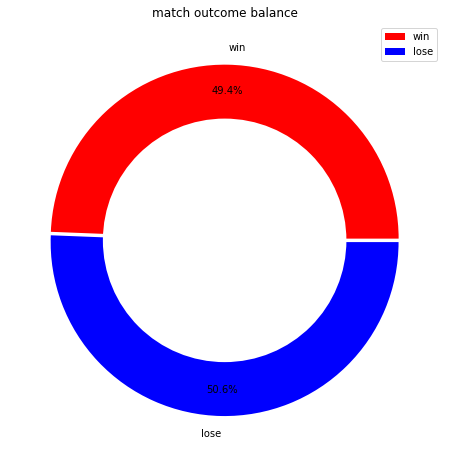

In [26]:
def donutPlot(targets, colors, labels, explode, title, figsize):
    ## Setting Chart
    fig, ax = plt.subplots(figsize = figsize)
    # Pie Chart
    plt.pie(targets, colors = colors, labels = labels, autopct = '%1.1f%%', pctdistance = 0.85, explode = explode)
    # draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    # Adding Title of chart
    plt.title(title)
    ## Adding legend
    plt.legend()
    # Displaying Chart
    plt.show()

def configTargetDonutPlot(data, column):
    positiveClass = data.loc[data[column] == 1].count()[0]
    negativeClass = data.loc[data[column] == 0].count()[0]
    targets = [positiveClass, negativeClass]
    return targets

targets = configTargetDonutPlot(data, 'flWinner')
colors = ['red', 'blue']
labels = ['win', 'lose']
explode = [0.01, 0.01]
title = 'match outcome balance'
figsize = (10,8)

donutPlot(targets = targets,
          colors = colors,
          labels = labels,
          explode = explode,
          title = title,
          figsize = figsize)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184152 entries, 0 to 184151
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idLobbyGame     184152 non-null  int64  
 1   idPlayer        184152 non-null  int64  
 2   idRoom          184152 non-null  int64  
 3   qtKill          184152 non-null  int64  
 4   qtAssist        184152 non-null  int64  
 5   qtDeath         184152 non-null  int64  
 6   qtHs            184152 non-null  int64  
 7   qtBombeDefuse   184152 non-null  int64  
 8   qtBombePlant    184152 non-null  int64  
 9   qtTk            184032 non-null  float64
 10  qtTkAssist      184032 non-null  float64
 11  qt1Kill         184152 non-null  int64  
 12  qt2Kill         184152 non-null  int64  
 13  qt3Kill         184152 non-null  int64  
 14  qt4Kill         184152 non-null  int64  
 15  qt5Kill         184152 non-null  int64  
 16  qtPlusKill      184152 non-null  int64  
 17  qtFirstKil

In [28]:
def checkNaNValues(df):
    return df.isna().sum()

checkNaNValues(data)

idLobbyGame         0
idPlayer            0
idRoom              0
qtKill              0
qtAssist            0
qtDeath             0
qtHs                0
qtBombeDefuse       0
qtBombePlant        0
qtTk              120
qtTkAssist        120
qt1Kill             0
qt2Kill             0
qt3Kill             0
qt4Kill             0
qt5Kill             0
qtPlusKill          0
qtFirstKill         0
vlDamage            0
qtHits            120
qtShots             0
qtLastAlive       120
qtClutchWon         0
qtRoundsPlayed      0
descMapName         0
vlLevel             0
qtSurvived        705
qtTrade           705
qtFlashAssist     705
qtHitHeadshot     705
qtHitChest        705
qtHitStomach      705
qtHitLeftAtm      705
qtHitRightArm     705
qtHitLeftLeg      705
qtHitRightLeg     705
flWinner            0
dtCreatedAt         0
dtype: int64

In [29]:
data.describe()

idLobbyGame       idPlayer         idRoom         qtKill  \
count  184152.000000  184152.000000  184152.000000  184152.000000   
mean    84720.886854    1361.148622   88343.226248      19.113531   
std     49931.048091     784.157397   51564.451107       7.481041   
min         1.000000       1.000000       1.000000       0.000000   
25%     41399.750000     676.000000   43742.750000      14.000000   
50%     83838.500000    1388.000000   87877.500000      19.000000   
75%    127911.250000    2061.000000  133000.250000      24.000000   
max    172911.000000    2716.000000  178500.000000      85.000000   

            qtAssist        qtDeath           qtHs  qtBombeDefuse  \
count  184152.000000  184152.000000  184152.000000  184152.000000   
mean        3.756033      18.792459       7.640123       0.316054   
std         2.205265       5.211614       4.042324       0.575803   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000      16.000000       5.000000       0.000000   
50%         4.000000      19.000000       7.000000       0.000000   
75%         5.000000      22.000000      10.000000       1.000000   
max        24.000000      65.000000      41.000000       5.000000   

        qtBombePlant           qtTk  ...        qtTrade  qtFlashAssist  \
count  184152.000000  184032.000000  ...  183447.000000  183447.000000   
mean        1.321349       0.022463  ...       3.095254       0.570012   
std         1.336699       0.156566  ...       1.885027       0.906774   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       2.000000       0.000000   
50%         1.000000       0.000000  ...       3.000000       0.000000   
75%         2.000000       0.000000  ...       4.000000       1.000000   
max        12.000000      12.000000  ...      20.000000      14.000000   

       qtHitHeadshot     qtHitChest   qtHitStomach   qtHitLeftAtm  \
count  183447.000000  183447.000000  183447.000000  183447.000000   
mean        9.642889      29.305194      13.525509       1.902511   
std         4.769723      11.657993       7.102067       1.650325   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000      21.000000       8.000000       1.000000   
50%         9.000000      28.000000      13.000000       2.000000   
75%        12.000000      36.000000      18.000000       3.000000   
max        49.000000     122.000000      77.000000      17.000000   

       qtHitRightArm   qtHitLeftLeg  qtHitRightLeg       flWinner  
count  183447.000000  183447.000000  183447.000000  184152.000000  
mean        5.106091       2.265641       2.496509       0.493766  
std         2.924184       2.062294       2.162557       0.499962  
min         0.000000       0.000000       0.000000       0.000000  
25%         3.000000       1.000000       1.000000       0.000000  
50%         5.000000       2.000000       2.000000       0.000000  
75%         7.000000       3.000000       4.000000       1.000000  
max        30.000000      21.000000      22.000000       1.000000  

[8 rows x 36 columns]

In [30]:
def getNaNRows(df):
    nan_rows = df[df.isna().any(axis=1)]
    return nan_rows

filteredMissingData = getNaNRows(data)
print(f'lenght of the missing data: {len(filteredMissingData)}')
filteredMissingData.head()

lenght of the missing data: 705


idLobbyGame  idPlayer  idRoom  qtKill  qtAssist  qtDeath  qtHs  \
428          396        10     396      13         5       26     9   
429          397        10     397      20         2       20    12   
435          402        10     402      21         1       23    13   
446          412        10     412      21         3       23    10   
447          413        10     413      34         4       22    21   

     qtBombeDefuse  qtBombePlant  qtTk  ...  qtFlashAssist  qtHitHeadshot  \
428              0             1   0.0  ...            NaN            NaN   
429              0             1   0.0  ...            NaN            NaN   
435              0             2   0.0  ...            NaN            NaN   
446              0             0   0.0  ...            NaN            NaN   
447              0             1   0.0  ...            NaN            NaN   

     qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
428         NaN           NaN           NaN            NaN           NaN   
429         NaN           NaN           NaN            NaN           NaN   
435         NaN           NaN           NaN            NaN           NaN   
446         NaN           NaN           NaN            NaN           NaN   
447         NaN           NaN           NaN            NaN           NaN   

     qtHitRightLeg  flWinner          dtCreatedAt  
428            NaN         0  2021-11-04 20:26:02  
429            NaN         0  2021-11-04 21:25:14  
435            NaN         0  2021-11-06 01:33:23  
446            NaN         0  2021-11-08 22:47:40  
447            NaN         0  2021-11-09 00:12:28  

[5 rows x 38 columns]

In [31]:
## the classes are balanced, so we don't have a problem in dropping those rows with NaN values
def dropRowsWithNaNs(data):
    new_data = data.dropna().reset_index(drop = True)
    return new_data

data = dropRowsWithNaNs(data)
checkNaNValues(data)

idLobbyGame       0
idPlayer          0
idRoom            0
qtKill            0
qtAssist          0
qtDeath           0
qtHs              0
qtBombeDefuse     0
qtBombePlant      0
qtTk              0
qtTkAssist        0
qt1Kill           0
qt2Kill           0
qt3Kill           0
qt4Kill           0
qt5Kill           0
qtPlusKill        0
qtFirstKill       0
vlDamage          0
qtHits            0
qtShots           0
qtLastAlive       0
qtClutchWon       0
qtRoundsPlayed    0
descMapName       0
vlLevel           0
qtSurvived        0
qtTrade           0
qtFlashAssist     0
qtHitHeadshot     0
qtHitChest        0
qtHitStomach      0
qtHitLeftAtm      0
qtHitRightArm     0
qtHitLeftLeg      0
qtHitRightLeg     0
flWinner          0
dtCreatedAt       0
dtype: int64

In [32]:

def getUniqueValues(df):
    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].nunique()
    return pd.Series(unique_values)


uniqueDataValues = getUniqueValues(data)
uniqueDataValues

idLobbyGame       172270
idPlayer            2469
idRoom            177839
qtKill                74
qtAssist              21
qtDeath               58
qtHs                  39
qtBombeDefuse          6
qtBombePlant          13
qtTk                   7
qtTkAssist             9
qt1Kill               30
qt2Kill               17
qt3Kill               12
qt4Kill                7
qt5Kill                4
qtPlusKill             1
qtFirstKill           20
vlDamage            5891
qtHits               213
qtShots             1401
qtLastAlive           28
qtClutchWon            9
qtRoundsPlayed        67
descMapName            8
vlLevel               22
qtSurvived            36
qtTrade               18
qtFlashAssist         12
qtHitHeadshot         48
qtHitChest           108
qtHitStomach          69
qtHitLeftAtm          18
qtHitRightArm         28
qtHitLeftLeg          22
qtHitRightLeg         23
flWinner               2
dtCreatedAt       169864
dtype: int64

In [33]:
def filterData(series, condition):
    filtered_series = series[condition]
    return filtered_series

filterData(uniqueDataValues, uniqueDataValues <= 2)

qtPlusKill    1
flWinner      2
dtype: int64

In [34]:
data['qtPlusKill'].value_counts()

0    183447
Name: qtPlusKill, dtype: int64

In [35]:
def removeColumn(df, columnsName):
    new_df = df.drop(columns=[columnsName])
    return new_df

data = removeColumn(data, 'qtPlusKill')
data.columns

Index(['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtFirstKill',
       'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon',
       'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade',
       'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach',
       'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg',
       'flWinner', 'dtCreatedAt'],
      dtype='object')

# Descriptive Statistics

In [36]:
from sklearn.preprocessing import LabelEncoder


def splitData(df, dropList, target):
    x = df.drop(dropList, axis = 1)
    y = df[target]
    return x, y


def encodeSingleLabel(column):
    enc = LabelEncoder()
    new_column = enc.fit_transform(column)
    return new_column


def removeCategoricalFeatures(df):
    numericalColumns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numericalDF = df[numericalColumns]
    return numericalDF


def getFeatureTypes(df):
    feature_types = {}

    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            feature_types[col] = 'numerical'
        else:
            feature_types[col] = 'categorical'

    return feature_types

def convertCategoricalFeatures(df, featureTypes):
    for colName, featureType in featureTypes.items():
        if featureType == 'categorical':
            df[colName] = encodeSingleLabel(df[colName])

    return df

def describeData(df):
    statistics = pd.DataFrame()
    for col in df.columns:
        col_stats = {}
        col_data = df[col]

        col_stats['mean'] = np.mean(col_data)
        col_stats['std'] = np.std(col_data)
        col_stats['min'] = np.min(col_data)
        col_stats['25%'] = np.percentile(col_data, 25)
        col_stats['50%'] = np.median(col_data)
        col_stats['75%'] = np.percentile(col_data, 75)
        col_stats['max'] = np.max(col_data)
        col_stats['skew'] = col_data.skew()
        col_stats['kurtosis'] = col_data.kurtosis()

        statistics[col] = col_stats.values()
        statistics.index = col_stats.keys()

    return statistics.T

X, y = splitData(data, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')
X = removeCategoricalFeatures(X)

statsData = describeData(X)
statsData

mean         std  min     25%     50%     75%      max  \
qtKill            19.111940    7.482559  0.0    14.0    19.0    24.0     85.0   
qtAssist           3.752326    2.202281  0.0     2.0     4.0     5.0     24.0   
qtDeath           18.794785    5.211966  0.0    16.0    19.0    22.0     65.0   
qtHs               7.634439    4.040298  0.0     5.0     7.0    10.0     41.0   
qtBombeDefuse      0.316064    0.575848  0.0     0.0     0.0     1.0      5.0   
qtBombePlant       1.320376    1.336235  0.0     0.0     1.0     2.0     12.0   
qtTk               0.022328    0.155968  0.0     0.0     0.0     0.0     12.0   
qtTkAssist         0.248181    0.548601  0.0     0.0     0.0     0.0      9.0   
qt1Kill            8.008978    3.042899  0.0     6.0     8.0    10.0     31.0   
qt2Kill            3.429993    2.050796  0.0     2.0     3.0     5.0     16.0   
qt3Kill            1.066679    1.128892  0.0     0.0     1.0     2.0     11.0   
qt4Kill            0.221088    0.492372  0.0     0.0     0.0     0.0      6.0   
qt5Kill            0.024983    0.159629  0.0     0.0     0.0     0.0      3.0   
qtFirstKill        2.697008    1.948670  0.0     1.0     2.0     4.0     20.0   
vlDamage        2502.422672  878.617636  0.0  1927.0  2454.0  3019.0  10794.0   
qtHits            64.244343   22.900711  0.0    49.0    63.0    78.0    277.0   
qtShots          454.444019  171.294198  0.0   341.0   435.0   546.0   2131.0   
qtLastAlive        0.708368    1.287184  0.0     0.0     0.0     1.0     29.0   
qtClutchWon        0.469574    0.714578  0.0     0.0     0.0     1.0      8.0   
qtRoundsPlayed    26.458710    5.874348  1.0    23.0    27.0    29.0     84.0   
vlLevel           13.648700    4.679421  0.0    10.0    14.0    18.0     21.0   
qtSurvived         6.954079    3.238440  0.0     5.0     7.0     9.0     37.0   
qtTrade            3.095254    1.885022  0.0     2.0     3.0     4.0     20.0   
qtFlashAssist      0.570012    0.906772  0.0     0.0     0.0     1.0     14.0   
qtHitHeadshot      9.642889    4.769710  0.0     6.0     9.0    12.0     49.0   
qtHitChest        29.305194   11.657961  0.0    21.0    28.0    36.0    122.0   
qtHitStomach      13.525509    7.102048  0.0     8.0    13.0    18.0     77.0   
qtHitLeftAtm       1.902511    1.650321  0.0     1.0     2.0     3.0     17.0   
qtHitRightArm      5.106091    2.924176  0.0     3.0     5.0     7.0     30.0   
qtHitLeftLeg       2.265641    2.062288  0.0     1.0     2.0     3.0     21.0   
qtHitRightLeg      2.496509    2.162551  0.0     1.0     2.0     4.0     22.0   

                    skew    kurtosis  
qtKill          0.478615    0.934681  
qtAssist        0.680540    0.684511  
qtDeath         0.006572    1.933753  
qtHs            0.800099    1.125989  
qtBombeDefuse   1.893019    3.801088  
qtBombePlant    1.225907    1.886114  
qtTk            9.547344  251.245067  
qtTkAssist      2.641102    9.187335  
qt1Kill         0.383613    0.736816  
qt2Kill         0.605847    0.404729  
qt3Kill         1.204123    1.737171  
qt4Kill         2.431281    6.875295  
qt5Kill         6.520926   44.260256  
qtFirstKill     0.899740    1.119293  
vlDamage        0.457728    1.171435  
qtHits          0.533953    1.235935  
qtShots         0.857468    2.191752  
qtLastAlive     5.826440   56.637237  
qtClutchWon     1.649382    3.183306  
qtRoundsPlayed  0.322209    4.119305  
vlLevel        -0.480393   -0.491781  
qtSurvived      0.139225    0.364657  
qtTrade         0.677489    0.676191  
qtFlashAssist   2.105235    6.266614  
qtHitHeadshot   0.749158    1.052746  
qtHitChest      0.611774    1.054711  
qtHitStomach    0.908768    1.519957  
qtHitLeftAtm    1.139411    1.848201  
qtHitRightArm   0.775956    0.964197  
qtHitLeftLeg    1.399530    3.033208  
qtHitRightLeg   1.324660    2.740187

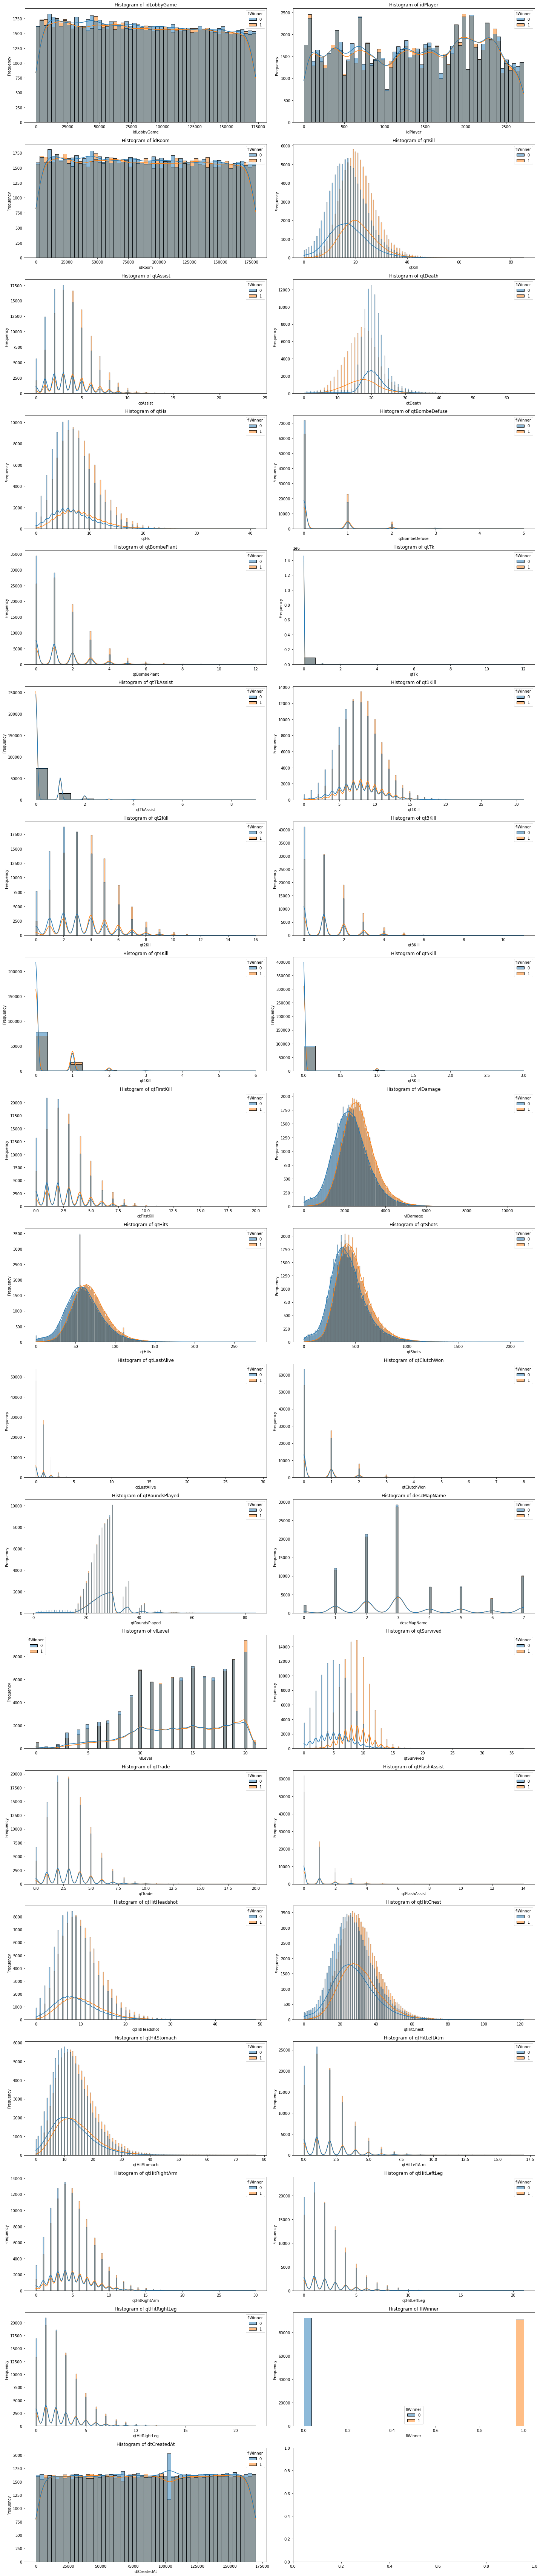

In [37]:
def histPlot(df):
    n_rows = (len(df.columns) + 1) // 2  # Number of rows
    n_cols = 2  # Number of columns
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))
    for ax, col in zip(axes.flat, df.columns):
        #print(df[col].value_counts())
        sns.histplot(data=df, x=col, hue = 'flWinner', kde=True, ax=ax)
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


featureTypes = getFeatureTypes(data)
data = convertCategoricalFeatures(data, featureTypes)
histPlot(data)


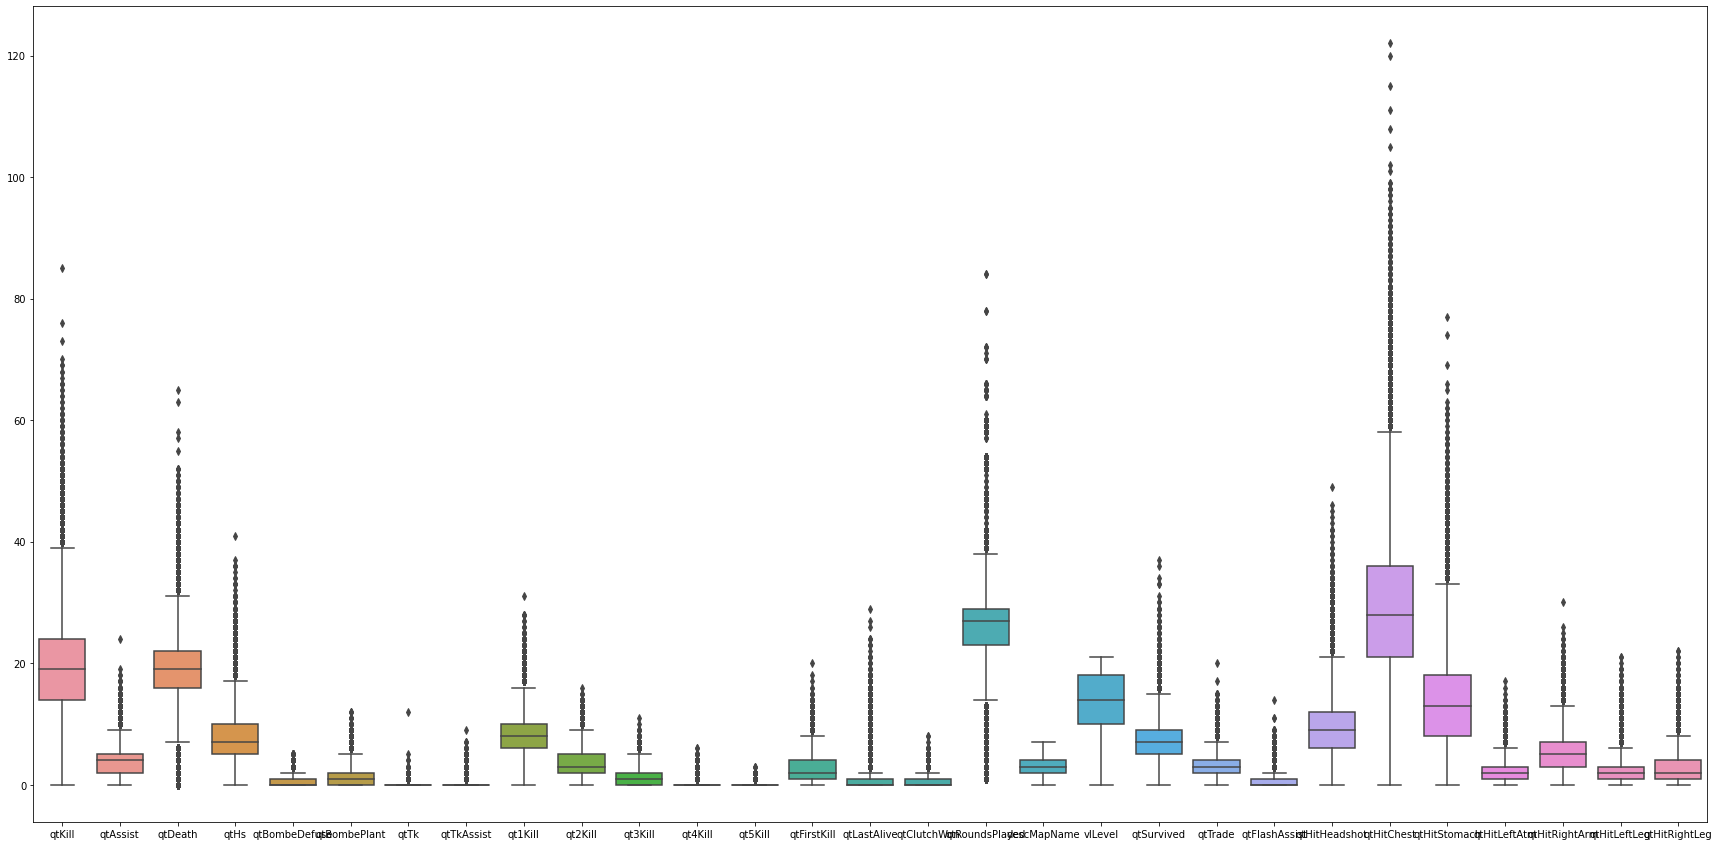

In [38]:
def boxPlots(df, figsize):
    fig, ax = plt.subplots(1, 1, figsize = figsize)
    sns.boxplot(data = df)
    plt.show()

def getTopKRangeColumns(df, k):
    ranges = df.max() - df.min()
    kHigherRanges = ranges.nlargest(k).index.tolist()
    return kHigherRanges

X, y = splitData(data, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')
columnNames = getTopKRangeColumns(X, 3)

kHigherRanges = X[columnNames]
withoutHigherRanges = X.drop(columnNames, axis = 1)

boxPlots(withoutHigherRanges, (30, 15))

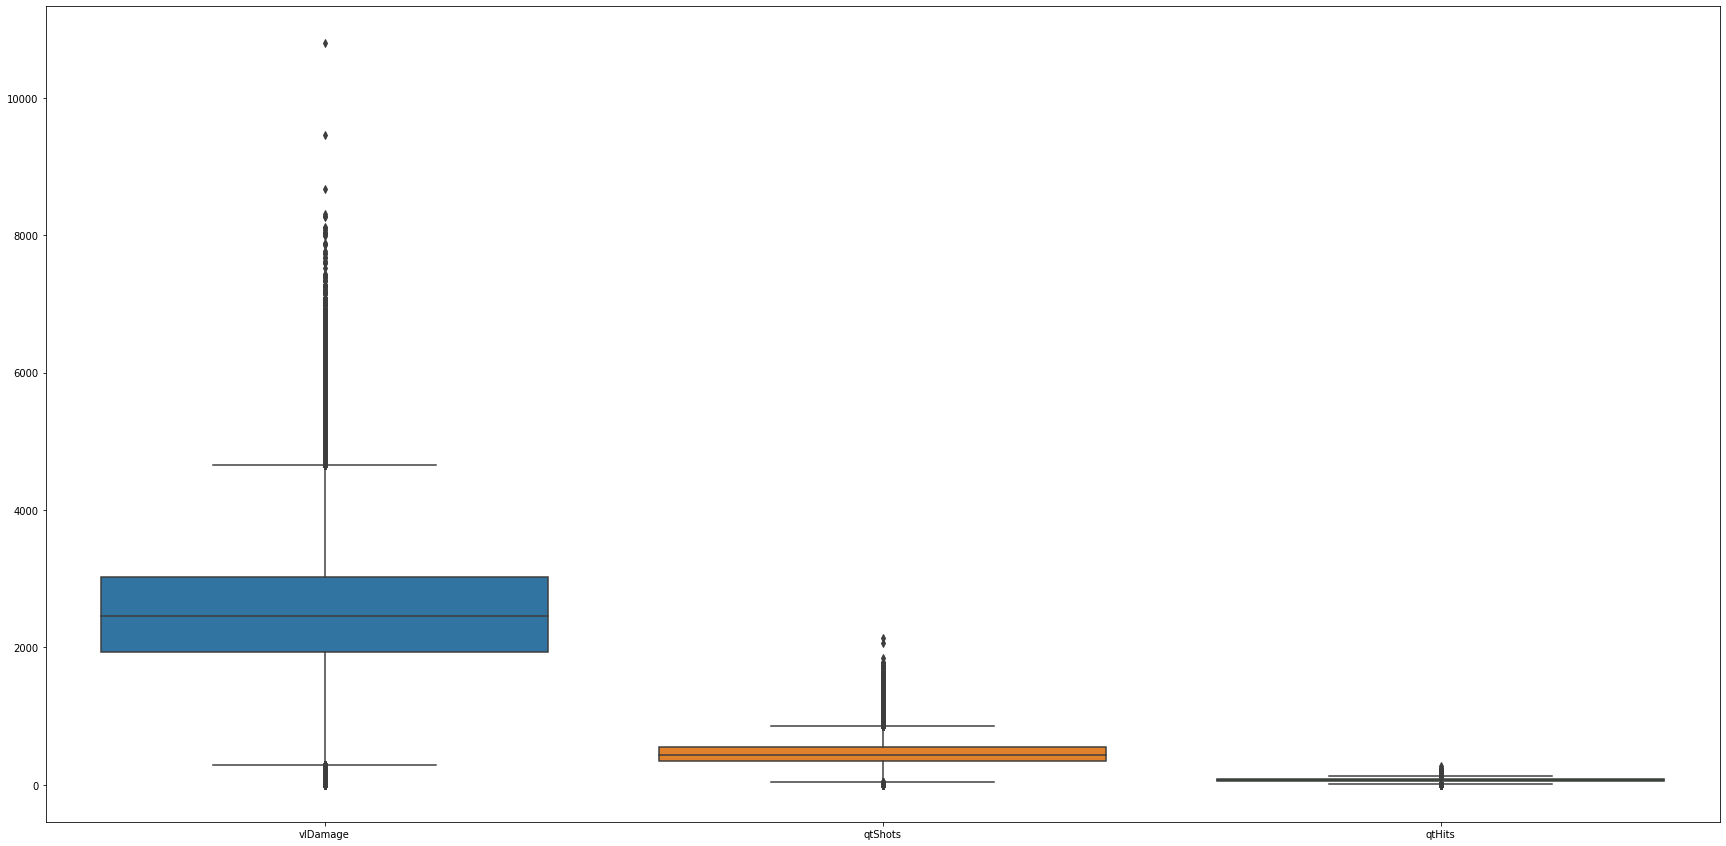

In [39]:
boxPlots(kHigherRanges, (30, 15))

In [40]:
from scipy.stats import normaltest, skewtest, kurtosistest


def getDistributionTypes(df):
    """
    Returns the type of distribution for each column of a dataset.
    
    Parameters:
    -----------
    dataset : pandas DataFrame
        The dataset to be analyzed.
    
    Returns:
    --------
    dict
        A dictionary containing the column names as keys and their distribution types as values.
    """
    
    distribution_types = {}
    
    for col in df.columns:
        # Test for normality
        normaltest_result = normaltest(df[col])
        
        if normaltest_result.pvalue < 0.05:
            # If not normal, test for skewness and kurtosis
            skewtest_result = skewtest(df[col])
            kurtosistest_result = kurtosistest(df[col])
            
            if skewtest_result.pvalue < 0.05 and kurtosistest_result.pvalue < 0.05:
                distribution_types[col] = 'highly skewed and peaked'
            elif skewtest_result.pvalue < 0.05:
                distribution_types[col] = 'skewed'
            elif kurtosistest_result.pvalue < 0.05:
                distribution_types[col] = 'peaked'
            else:
                distribution_types[col] = 'neither normal, skewed, nor peaked'
        else:
            distribution_types[col] = 'normal'
    
    return distribution_types


distributionTypes = getDistributionTypes(data)
distributionTypes
#bestCleanMethod = decideCleaningMethod(distributionTypes)
#bestCleanMethod

{'idLobbyGame': 'highly skewed and peaked',
 'idPlayer': 'highly skewed and peaked',
 'idRoom': 'highly skewed and peaked',
 'qtKill': 'highly skewed and peaked',
 'qtAssist': 'highly skewed and peaked',
 'qtDeath': 'peaked',
 'qtHs': 'highly skewed and peaked',
 'qtBombeDefuse': 'highly skewed and peaked',
 'qtBombePlant': 'highly skewed and peaked',
 'qtTk': 'highly skewed and peaked',
 'qtTkAssist': 'highly skewed and peaked',
 'qt1Kill': 'highly skewed and peaked',
 'qt2Kill': 'highly skewed and peaked',
 'qt3Kill': 'highly skewed and peaked',
 'qt4Kill': 'highly skewed and peaked',
 'qt5Kill': 'highly skewed and peaked',
 'qtFirstKill': 'highly skewed and peaked',
 'vlDamage': 'highly skewed and peaked',
 'qtHits': 'highly skewed and peaked',
 'qtShots': 'highly skewed and peaked',
 'qtLastAlive': 'highly skewed and peaked',
 'qtClutchWon': 'highly skewed and peaked',
 'qtRoundsPlayed': 'highly skewed and peaked',
 'descMapName': 'highly skewed and peaked',
 'vlLevel': 'highly ske

# Data cleaning

In [41]:
from scipy.stats import zscore, iqr

def decideDataCleaningMethod(df):
    """
    This function calculates the IQR and Z-score for each column in the input DataFrame, and then compares the 
    proportion of outliers detected by each method. If the proportion of outliers is lower for the IQR method, 
    it is chosen for that column. Otherwise, the Z-score method is chosen. The function returns a Series 
    with the column names as index and a single column 'cleaning_method' with their corresponding cleaning method 
    (IQR or Z-score) as values.

    Parameters:
    -----------
    df : pandas DataFrame
        The input DataFrame to be cleaned.

    Returns:
    --------
    pandas Series
        A Series containing the column names as index and a single column 'cleaning_method' with their corresponding 
        cleaning method (IQR or Z-score) as values.
    """
    cleaning_methods = {}

    for col in df.columns:
        # calculate the IQR and Z-score for the column
        q1, q3 = np.percentile(df[col].dropna(), [25, 75])
        iqr_result = iqr(df[col].dropna())
        z_score_result = zscore(df[col].dropna())

        # check if IQR or Z-score is more appropriate for the column
        if iqr_result == 0:
            cleaning_methods[col] = 'Z-score'
        else:
            iqr_outliers = df[col].between(q1 - 1.5*iqr_result, q3 + 1.5*iqr_result).sum() / len(df.dropna())
            z_outliers = (abs(z_score_result) > 3).sum() / len(df.dropna())

            if iqr_outliers < z_outliers:
                cleaning_methods[col] = 'IQR'
            else:
                cleaning_methods[col] = 'Z-score'

    return pd.Series(cleaning_methods, name='cleaning_method')



    
## X, y = splitData(data, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')
cleaningMethod = decideDataCleaningMethod(data)
cleaningMethod

idLobbyGame       Z-score
idPlayer          Z-score
idRoom            Z-score
qtKill            Z-score
qtAssist          Z-score
qtDeath           Z-score
qtHs              Z-score
qtBombeDefuse     Z-score
qtBombePlant      Z-score
qtTk              Z-score
qtTkAssist        Z-score
qt1Kill           Z-score
qt2Kill           Z-score
qt3Kill           Z-score
qt4Kill           Z-score
qt5Kill           Z-score
qtFirstKill       Z-score
vlDamage          Z-score
qtHits            Z-score
qtShots           Z-score
qtLastAlive       Z-score
qtClutchWon       Z-score
qtRoundsPlayed    Z-score
descMapName       Z-score
vlLevel           Z-score
qtSurvived        Z-score
qtTrade           Z-score
qtFlashAssist     Z-score
qtHitHeadshot     Z-score
qtHitChest        Z-score
qtHitStomach      Z-score
qtHitLeftAtm      Z-score
qtHitRightArm     Z-score
qtHitLeftLeg      Z-score
qtHitRightLeg     Z-score
flWinner          Z-score
dtCreatedAt       Z-score
Name: cleaning_method, dtype: object

In [42]:
def dataCleaning(df, method='Z-score', threshold=3):
    """
    Clean a dataframe using either the IQR method or z-score method.

    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe to be cleaned.

    method : str
        The cleaning method to use. Either 'iqr' or 'z-score'.
        Defaults to 'z-score'.

    threshold : int or float
        The threshold value to use for detecting outliers.
        Defaults to 3.

    Returns:
    --------
    pandas DataFrame
        The cleaned dataframe.
    """
    if method.lower() == 'iqr':
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        return df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]
    
    elif method.lower() == 'z-score':
        z_df = df.apply(zscore)
        z_outliers = z_df.abs().max(axis=1)
        return df[z_outliers < threshold]
    
    else:
        raise ValueError("Invalid method specified. Valid options are 'iqr' and 'z-score'.")


method = cleaningMethod.mode()[0]
## dataCleaned = data
dataCleaned = dataCleaning(data, method)
print(f'size of the data: {len(data)}, size of the cleaned data: {len(dataCleaned)} using the {method} method')
dataCleaned.head()

size of the data: 183447, size of the cleaned data: 140492 using the Z-score method


idLobbyGame  idPlayer  idRoom  qtKill  qtAssist  qtDeath  qtHs  \
0            1         1       1       5         1       16     2   
1            2         1       2      24         3       18     6   
2            3         2       3       6         4       23     2   
3            3       391   27508      10         5       20     4   
4            4         2       4       8         4       26     6   

   qtBombeDefuse  qtBombePlant  qtTk  ...  qtFlashAssist  qtHitHeadshot  \
0              0             0   0.0  ...            0.0            3.0   
1              0             4   0.0  ...            0.0            7.0   
2              0             1   0.0  ...            0.0            3.0   
3              1             0   0.0  ...            0.0            6.0   
4              0             2   0.0  ...            2.0            8.0   

   qtHitChest  qtHitStomach  qtHitLeftAtm  qtHitRightArm  qtHitLeftLeg  \
0        13.0           4.0           2.0            2.0           1.0   
1        26.0          14.0           2.0            1.0           1.0   
2        15.0           8.0           1.0            2.0           0.0   
3        27.0          10.0           1.0            7.0           6.0   
4        19.0          12.0           2.0            3.0           2.0   

   qtHitRightLeg  flWinner  dtCreatedAt  
0            0.0         0       137961  
1            3.0         1       158805  
2            2.0         0         4473  
3            6.0         1         4473  
4            5.0         0        12986  

[5 rows x 37 columns]

# Feature Analysis

In [43]:
import statsmodels.stats.power as smp

def powerAnalysis(df, effect_size, alpha, power, alternative='two-sided'):
    """
    Calculates the sample size required for each group in a pandas DataFrame
    to achieve a desired level of statistical power.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    effect_size (float): The standardized effect size to be detected.
    alpha (float): The significance level of the test.
    power (float): The desired level of statistical power.
    alternative (str): The alternative hypothesis for the test ('two-sided', 'larger', or 'smaller').

    Returns:
    pandas.DataFrame: A DataFrame containing the sample size required for each group to achieve the desired level of power.
    """

    # Determine the number of groups and observations per group
    num_groups = df.shape[1]
    num_obs = df.shape[0]

    # Calculate the sample size required for each group
    sample_sizes = []
    for i in range(num_groups):
        effect_size_i = effect_size / (num_groups ** 0.5)  # Bonferroni correction
        sample_size_i = smp.tt_ind_solve_power(effect_size=effect_size_i, nobs1=None, alpha=alpha, power=power, ratio=1, alternative=alternative)
        sample_sizes.append(sample_size_i)

    # Convert the sample sizes to integers and return as a DataFrame
    sample_sizes = [int(round(size)) for size in sample_sizes]
    result = pd.DataFrame({'Sample Size': sample_sizes}, index=df.columns)

    return result



np.random.seed(42)
sample_sizes = powerAnalysis(dataCleaned, effect_size=0.5, alpha=0.05, power=0.8, alternative='two-sided')
sample_sizes

Sample Size
idLobbyGame            2324
idPlayer               2324
idRoom                 2324
qtKill                 2324
qtAssist               2324
qtDeath                2324
qtHs                   2324
qtBombeDefuse          2324
qtBombePlant           2324
qtTk                   2324
qtTkAssist             2324
qt1Kill                2324
qt2Kill                2324
qt3Kill                2324
qt4Kill                2324
qt5Kill                2324
qtFirstKill            2324
vlDamage               2324
qtHits                 2324
qtShots                2324
qtLastAlive            2324
qtClutchWon            2324
qtRoundsPlayed         2324
descMapName            2324
vlLevel                2324
qtSurvived             2324
qtTrade                2324
qtFlashAssist          2324
qtHitHeadshot          2324
qtHitChest             2324
qtHitStomach           2324
qtHitLeftAtm           2324
qtHitRightArm          2324
qtHitLeftLeg           2324
qtHitRightLeg          2324
flWinner               2324
dtCreatedAt            2324

In [44]:
def percentageOfX(x, y):
    return (y / x)

def getSampleFromData(df, n):
    np.random.seed(42)
    sample_data = df.sample(frac = n)
    return sample_data


n = percentageOfX(x = len(dataCleaned), y = 5000)
sampleData = getSampleFromData(dataCleaned, n)

print(f'{len(sampleData)} sample size')
print(f'{len(dataCleaned)} data size')

5000 sample size
140492 data size


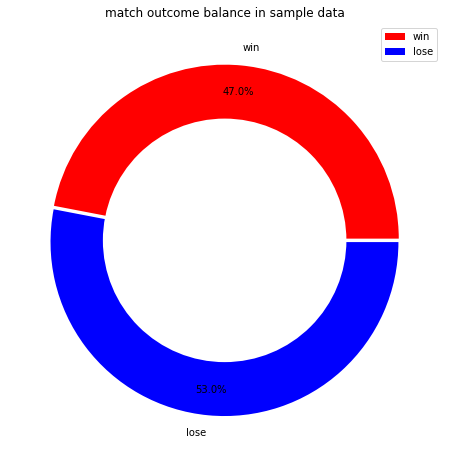

In [45]:
targets = configTargetDonutPlot(sampleData, 'flWinner')
title = 'match outcome balance in sample data'

donutPlot(targets = targets,
          colors = colors,
          labels = labels,
          explode = explode,
          title = title,
          figsize = figsize)

## Feature importance

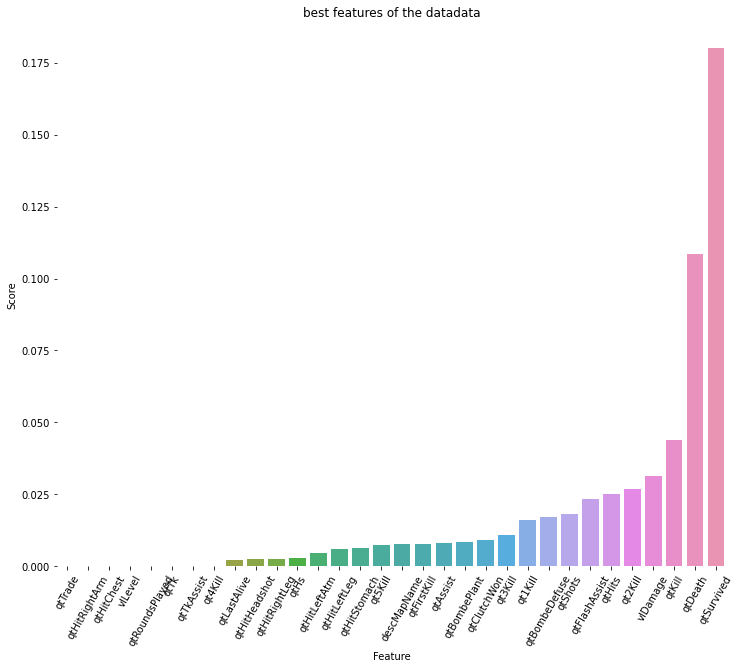

In [46]:
from sklearn.feature_selection import mutual_info_classif

def createEstimatorScoreDF(x, estimatorScore, sortedIdx):
    estimatorScoreDF = pd.DataFrame(estimatorScore[sortedIdx[::-1]], index=x.columns[sortedIdx[::-1]], columns=['score'])
    return estimatorScoreDF

def plotEstimatorScore(x, sortedIdx, estimatorScore, title):
    fig, ax = plt.subplots(1,1, figsize = (12,10))
    sns.barplot(x = x.columns[sortedIdx], y = estimatorScore[sortedIdx])
    ax.set(xlabel = 'Feature', ylabel = 'Score', title = title)
    plt.xticks(rotation = 60, fontsize = 10)
    sns.despine(left=True, bottom=True)
    plt.show()

def estimatorScore(x, y, title):
    estimatorScore = mutual_info_classif(x, y, random_state = 42)
    sortedIdx = np.argsort(estimatorScore)

    estimatorScoreDF = createEstimatorScoreDF(x, estimatorScore, sortedIdx)

    plotEstimatorScore(x, sortedIdx, estimatorScore, title)

    return estimatorScoreDF

def selectKBestFeatures(k, estimatorScore, df):
    k_best = k
    k_best_features = estimatorScore.iloc[:k_best, :].index
    k_best_df = df[k_best_features]
    return k_best_df




X, y = splitData(sampleData, ['idLobbyGame', 'idPlayer', 'idRoom', 'flWinner', 'dtCreatedAt'], 'flWinner')

featureTypes = getFeatureTypes(X)
X = convertCategoricalFeatures(X, featureTypes)

estimatorScores = estimatorScore(X, y, 'best features of the datadata')

## Best Features

In [47]:
k = 10

kBestFeatures = selectKBestFeatures(k, estimatorScores, X)
print(f'size of kBestFeatures: {len(kBestFeatures)}')

kBestFeatures.head()

size of kBestFeatures: 5000


qtSurvived  qtDeath  qtKill  vlDamage  qt2Kill  qtHits  qtFlashAssist  \
38820         13.0       15      17      2634        2    82.0            1.0   
180994        11.0       14      29      3486        7    92.0            0.0   
130470        12.0       22      22      3103        2    55.0            1.0   
153014         7.0       16      14      2154        1    51.0            1.0   
134434         2.0       17      15      2062        2    72.0            0.0   

        qtShots  qtBombeDefuse  qt1Kill  
38820       608              0       10  
180994      621              0        9  
130470      642              1       12  
153014      652              0        6  
134434      387              0        5

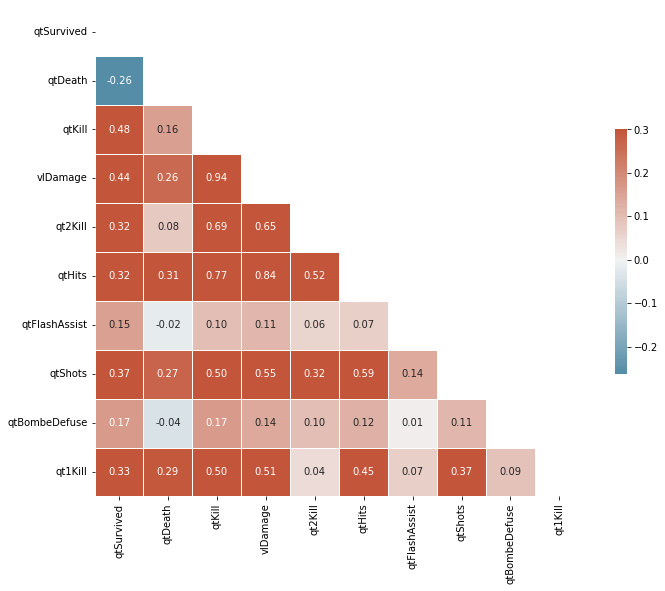

In [48]:
def correlationPlot(data):
    fig, ax = plt.subplots(figsize=(11, 9))
    corrMatrix = data.corr(method = 'pearson')
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                fmt = '.2f', annot = True)

    plt.show()

correlationPlot(kBestFeatures)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16144\3621842202.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kBestFeatures['flWinner'] = sampleData['flWinner']


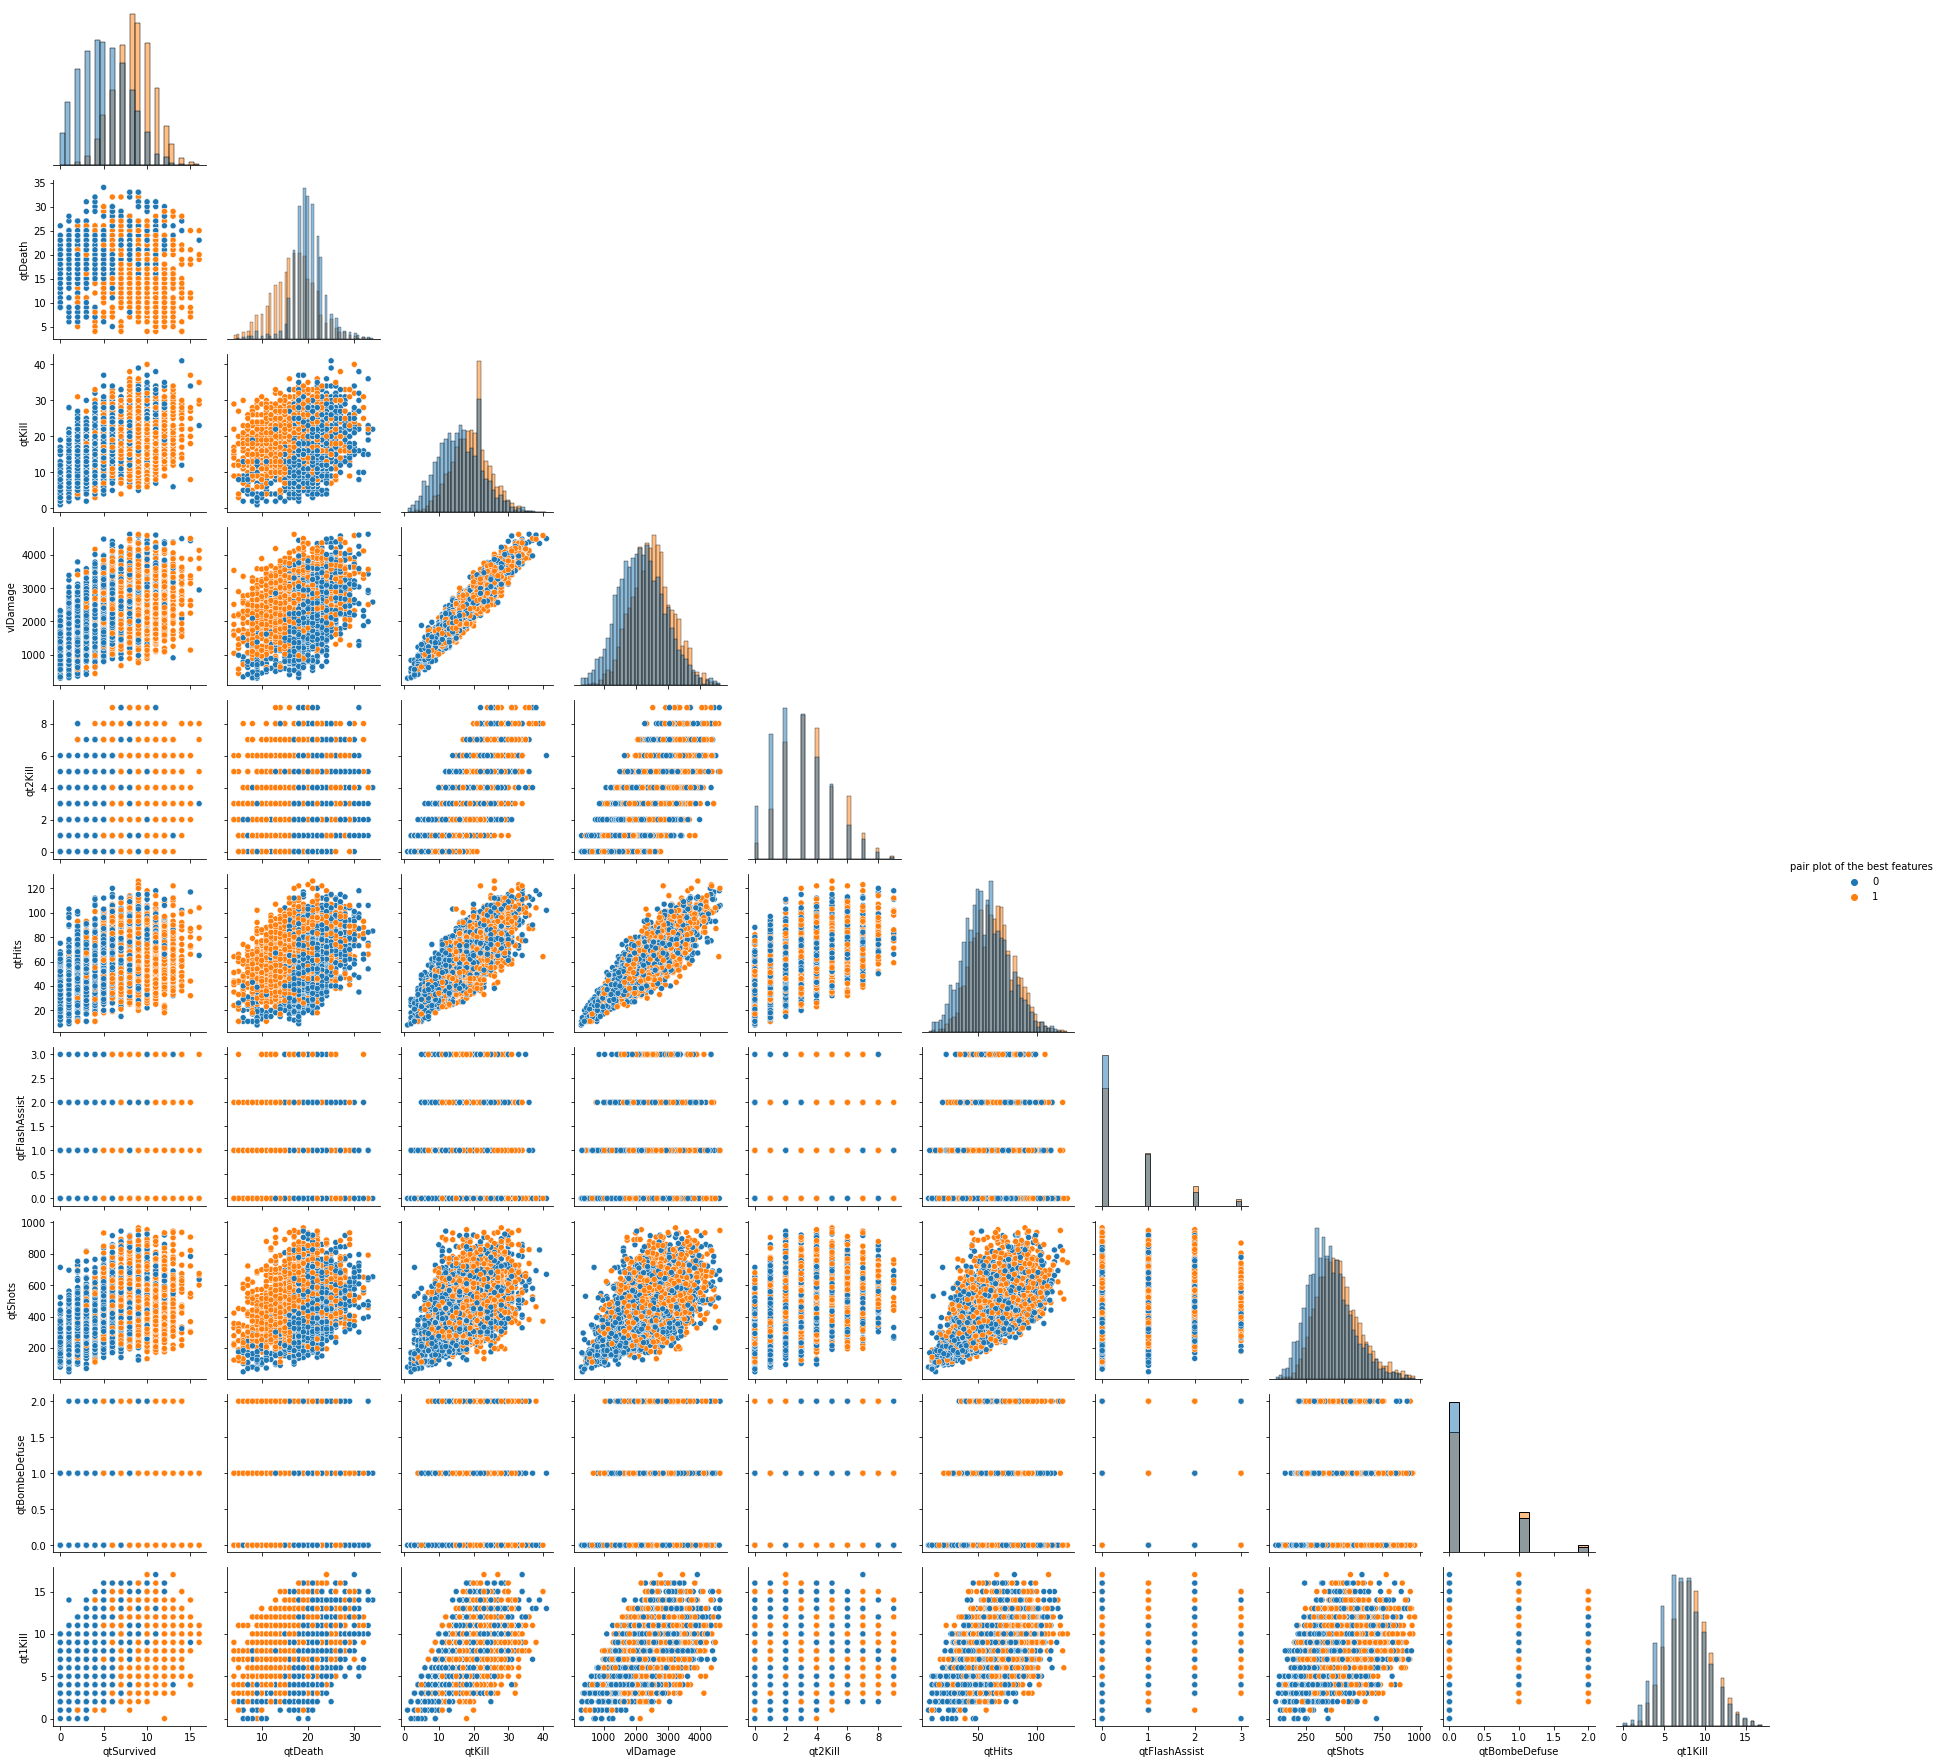

In [49]:
def pairPlot(df, hue):
    plot = sns.PairGrid(df, hue= hue, diag_sharey=False, corner=True)
    plot.map_lower(sns.scatterplot)
    plot.map_diag(sns.histplot)
    plot.add_legend(title="pair plot of the best features")
    plt.show()

kBestFeatures['flWinner'] = sampleData['flWinner']
pairPlot(kBestFeatures, 'flWinner')

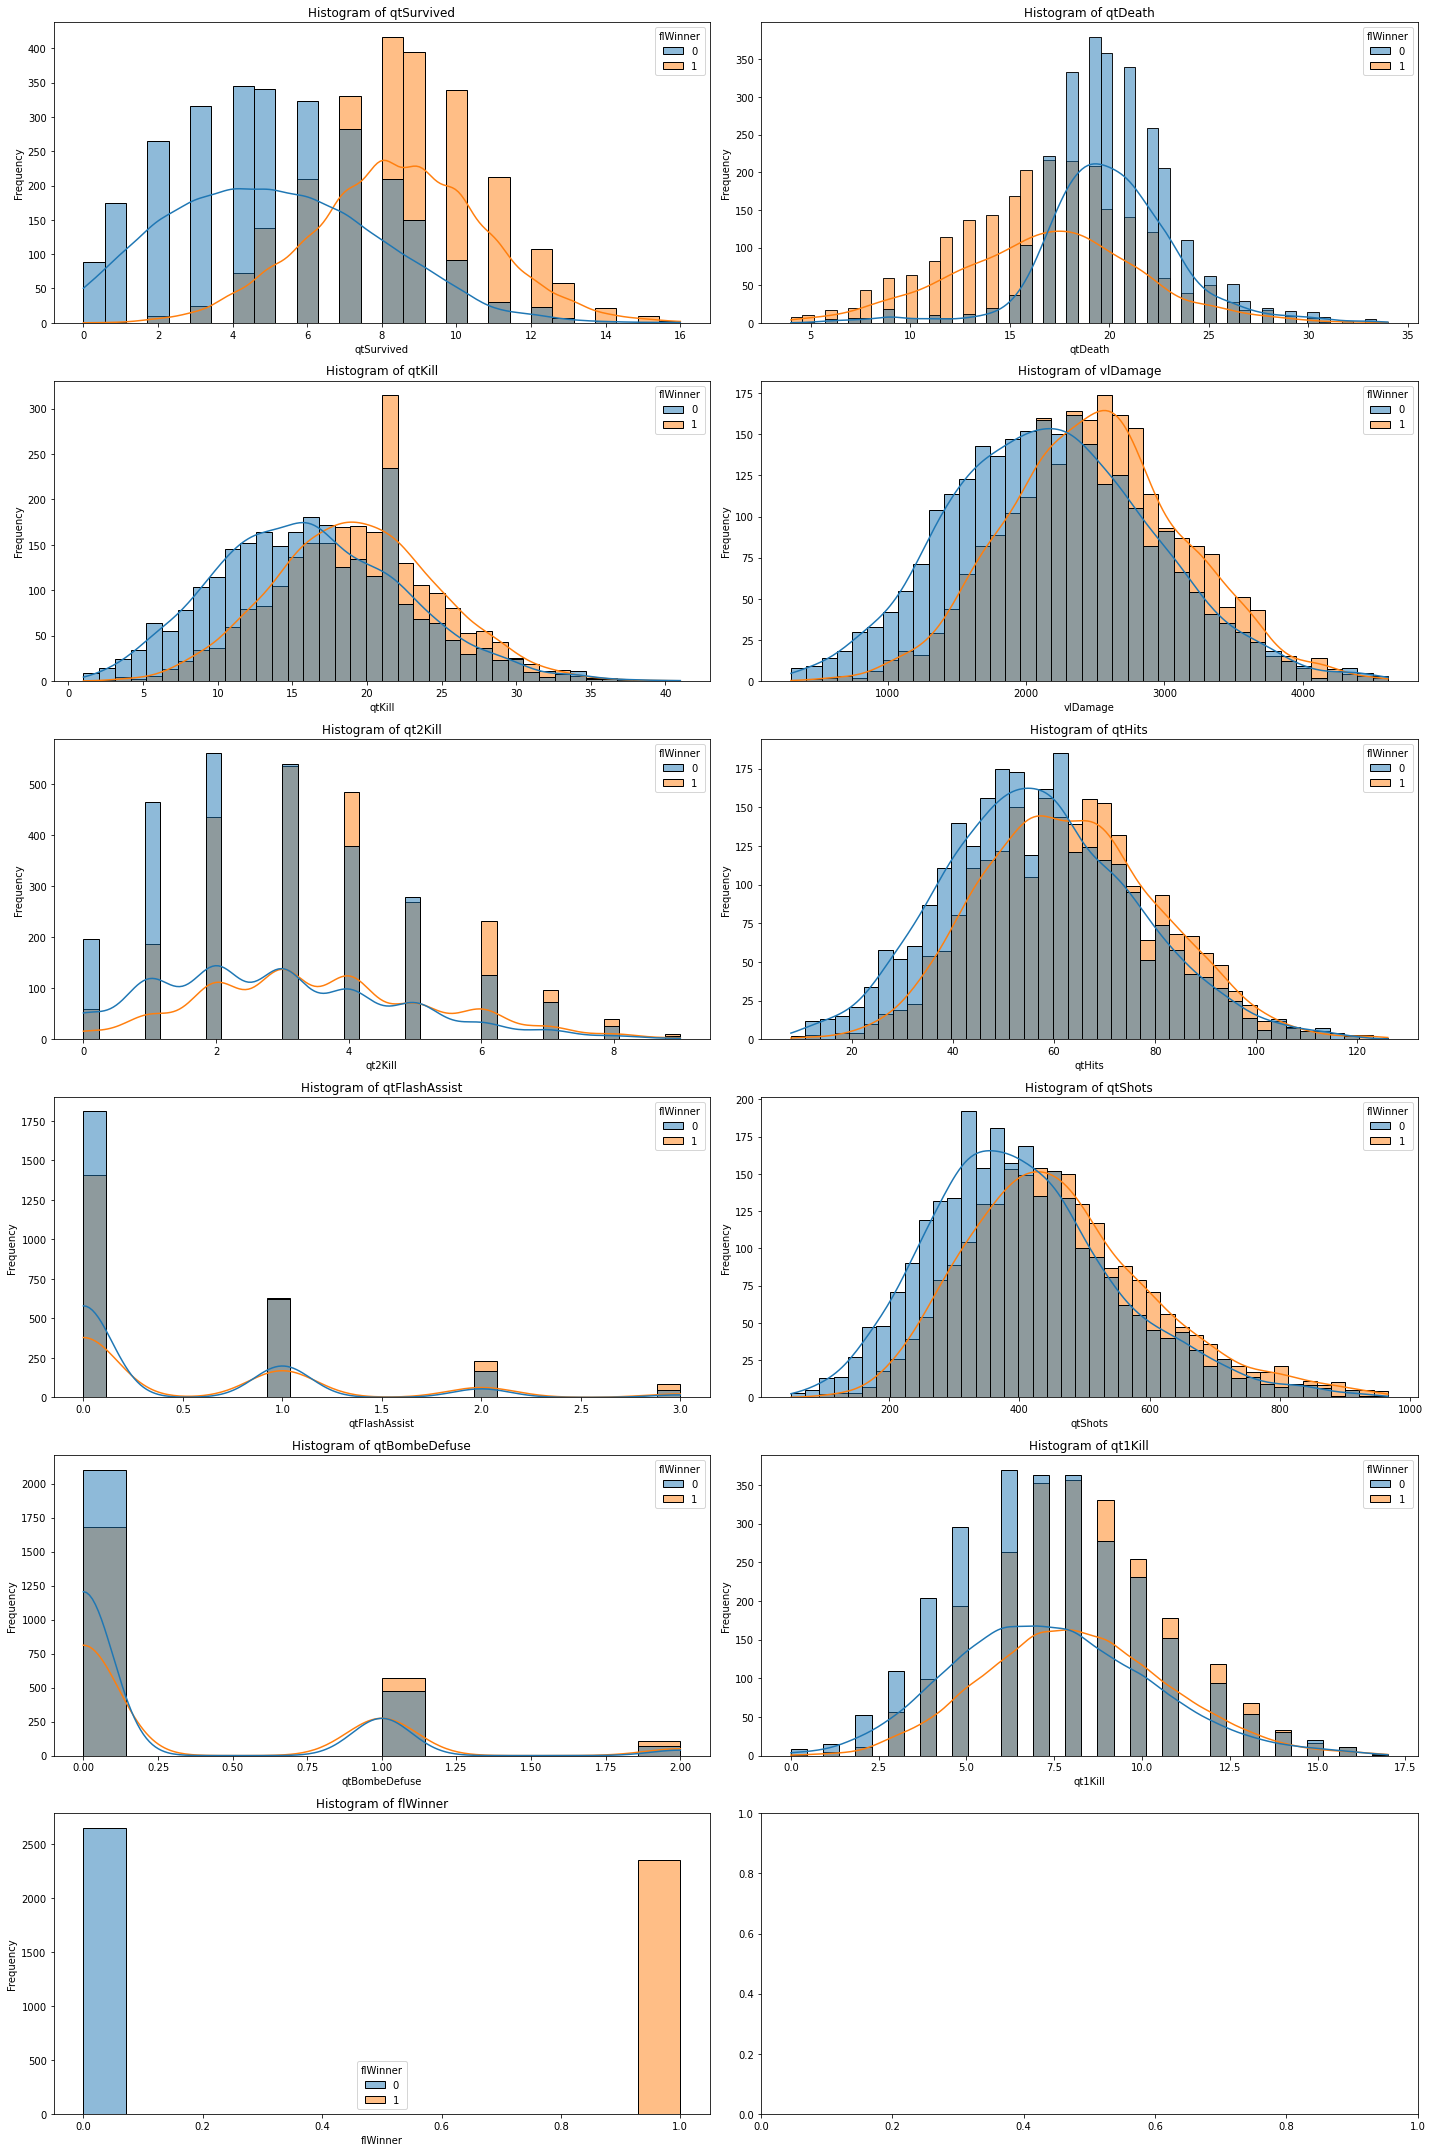

In [50]:
histPlot(kBestFeatures)

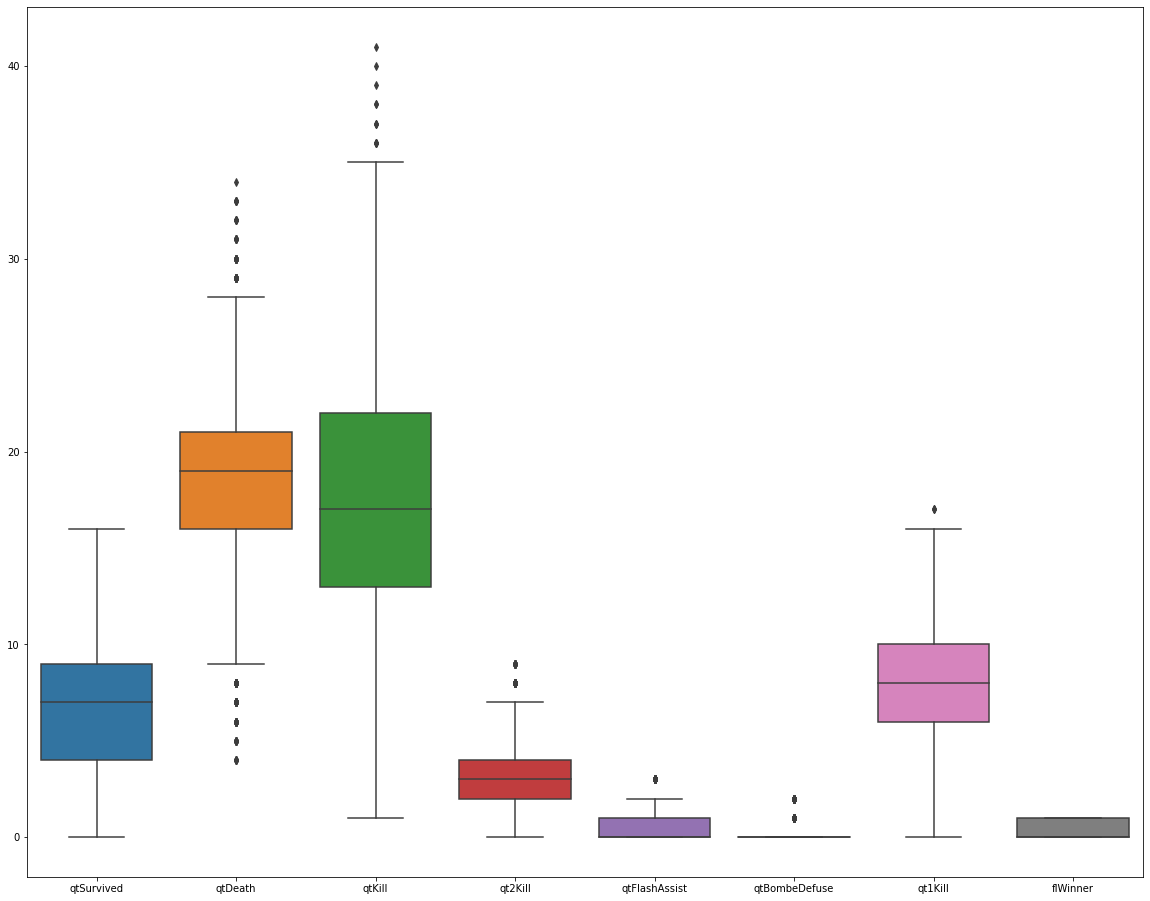

In [51]:
columnNames = getTopKRangeColumns(kBestFeatures, 3)
kHigherRanges = kBestFeatures[columnNames]
withoutHigherRanges = kBestFeatures.drop(columnNames, axis = 1)

boxPlots(withoutHigherRanges, (20, 16))

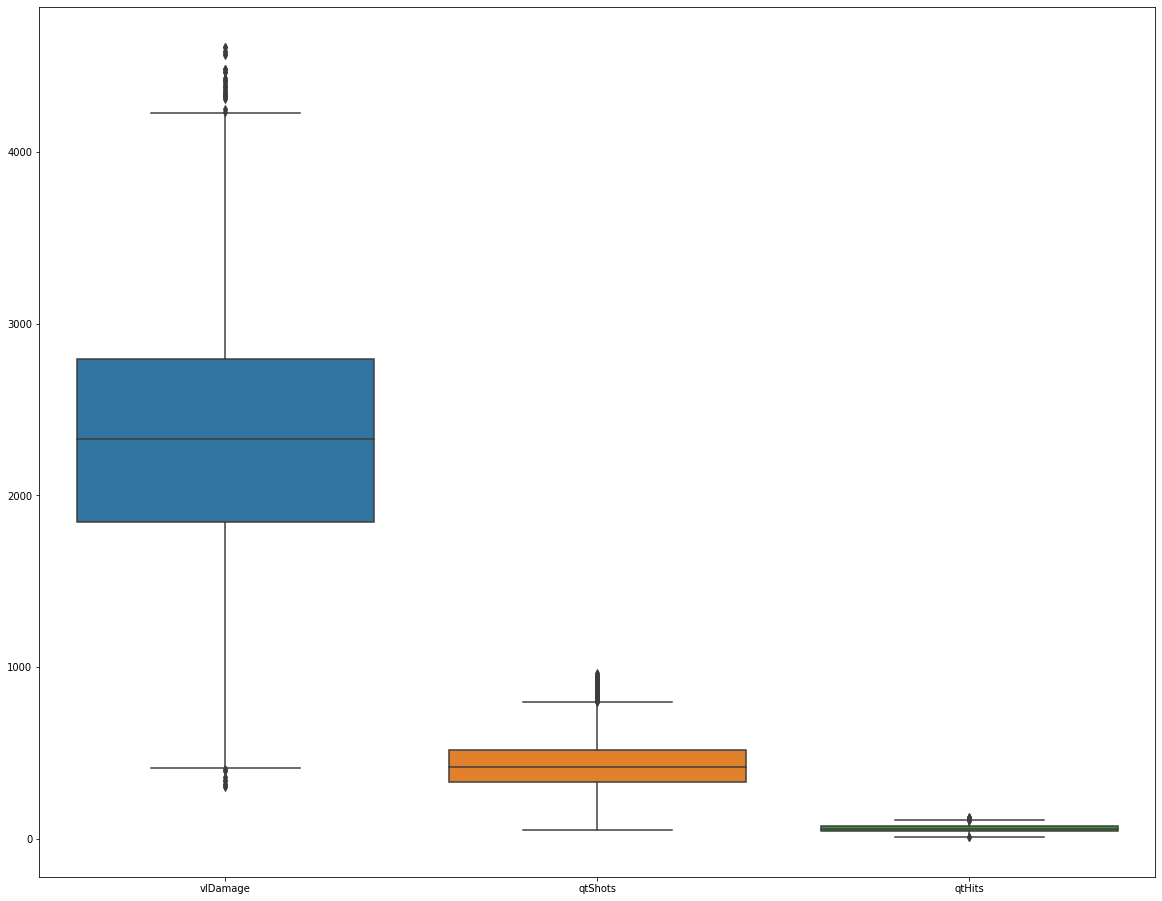

In [52]:
boxPlots(kHigherRanges, (20, 16))

# PCA

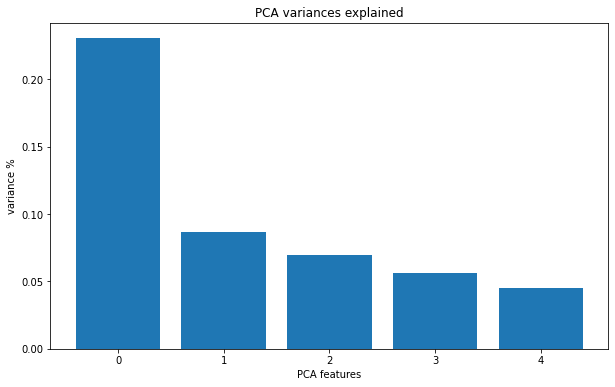

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

'''
def calculatingPCA(X, y, title, n_components):
    fig, ax = plt.subplots(figsize = (10,6))

    pca = PCA(n_components = n_components)
    principalComponents = pca.fit_transform(X)
    
    new_df = pd.DataFrame(principalComponents)
    new_df['target'] = y.values

    features = np.arange(pca.n_components)
    ax.bar(features, pca.explained_variance_ratio_)
    ax.set(xlabel = 'PCA features', ylabel = 'variance %', xticks = features, title = title)
    
    return new_df
'''
def calculatingPCA(X, y, title, n_components):
    fig, ax = plt.subplots(figsize = (10,6))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components = n_components)
    principalComponents = pca.fit_transform(X_scaled)
    
    new_df = pd.DataFrame(principalComponents)
    new_df['flWinner'] = y.values

    features = np.arange(pca.n_components)
    ax.bar(features, pca.explained_variance_ratio_)
    ax.set(xlabel = 'PCA features', ylabel = 'variance %', xticks = features, title = title)
    
    return new_df

def converColumnsToString(df):
    df.columns = df.columns.astype(str)
    return df

X, y = splitData(sampleData, ['flWinner'], 'flWinner')
PCA_components = {}
PCA_components['raw'] = calculatingPCA(X, y, 'PCA variances explained', 5)
PCA_components['raw'] = converColumnsToString(PCA_components['raw'])

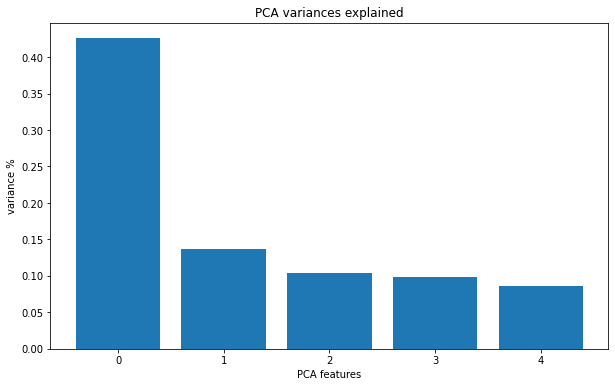

In [54]:
X, y = splitData(kBestFeatures, ['flWinner'], 'flWinner')

PCA_components['bestFeatures'] = calculatingPCA(X, y, 'PCA variances explained', 5)
PCA_components['bestFeatures'] = converColumnsToString(PCA_components['bestFeatures'])

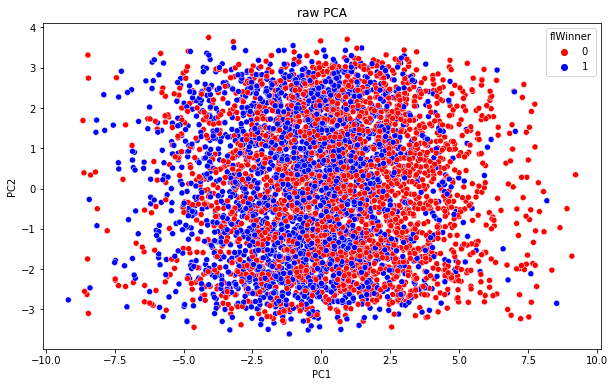

In [55]:
def plotPCA(df, title, target = 'flWinner', palette = ['red', 'blue']):

    fig, ax = plt.subplots(figsize = (10,6))

    sns.scatterplot(data = df, x = '0', y = '1', hue = target, palette = palette)
    ax.set(xlabel = 'PC1', ylabel = 'PC2', title = title)

    plt.show()

plotPCA(df = PCA_components['raw'], title = 'raw PCA')

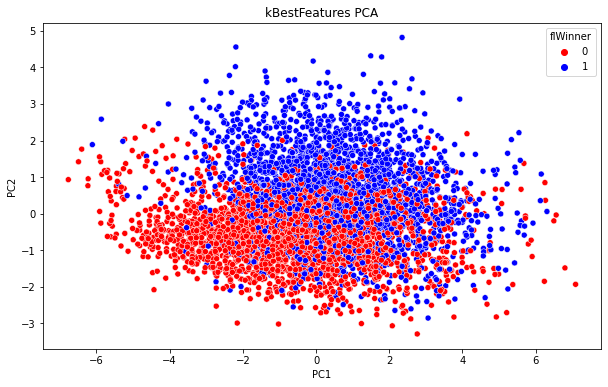

In [56]:
plotPCA(df = PCA_components['bestFeatures'], title = 'kBestFeatures PCA')

# Clustering Analysis

c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

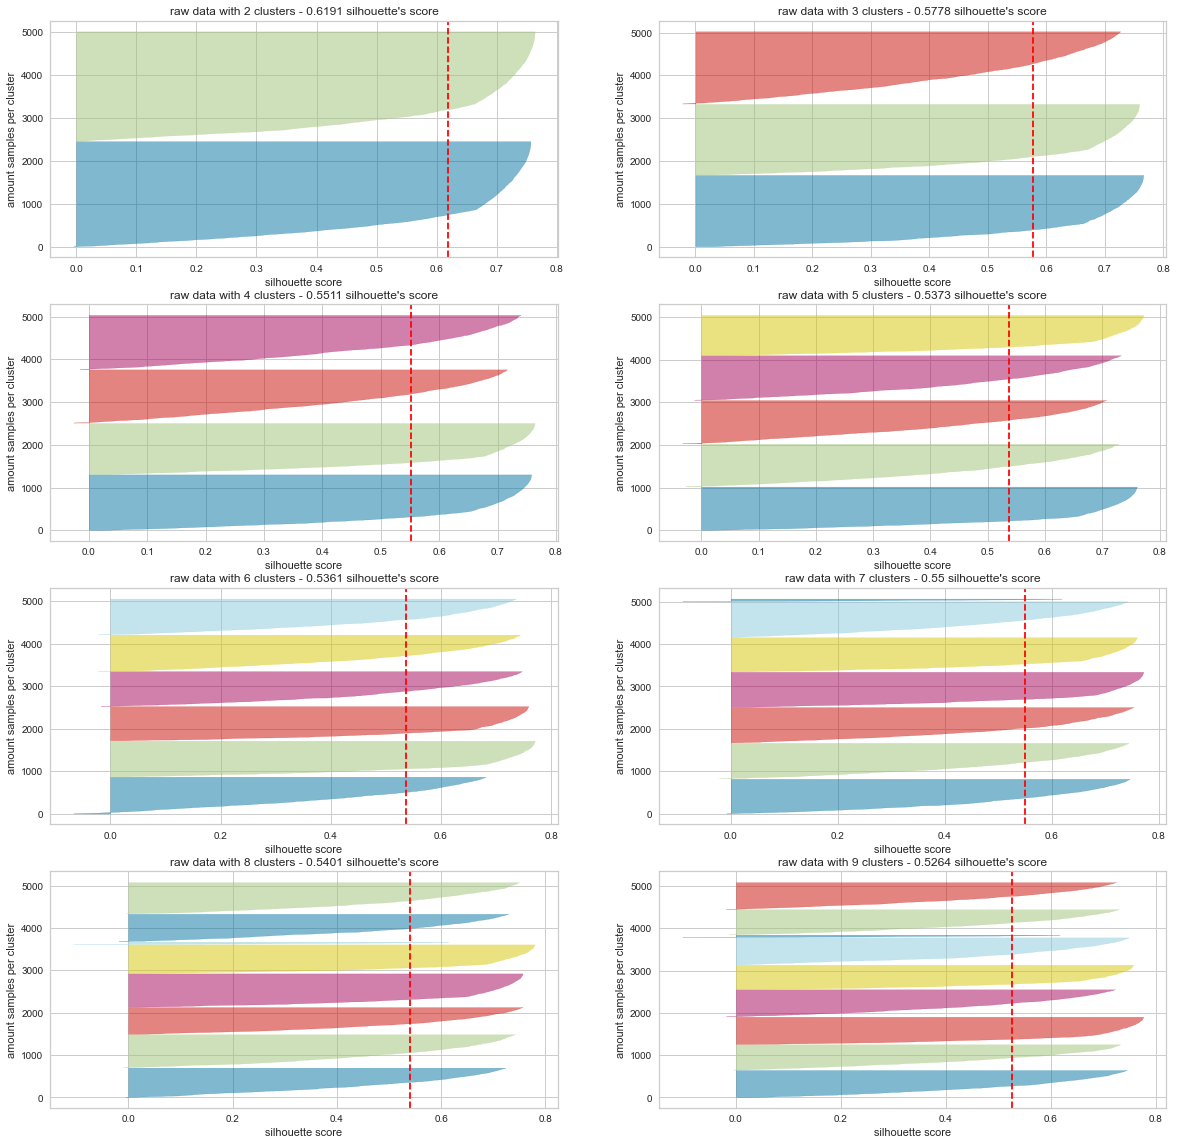

In [57]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


def elbowPlot(X, k):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k = (2,10))
    visualizer.fit(X)
    visualizer.show()

def plotSilhoetteVisualizer(X, Ks, ax, name):
    silhouette_coef_list = []
    for k in Ks:
        np.random.seed(42)
        km_model = KMeans(n_clusters = k)
        q, mod = divmod(k,2)
        visualizer = SilhouetteVisualizer(km_model, colors = 'yellowbrick', ax = ax[q-1][mod])
        visualizer.fit(X)
        ax[q-1][mod].set(title = f"{name} with {k} clusters - {round(visualizer.silhouette_score_, 4)} silhouette's score", 
                xlabel = 'silhouette score', 
                ylabel = 'amount samples per cluster')

        silhouette_coef_list.append(visualizer.silhouette_score_)
    return silhouette_coef_list


fig, ax = plt.subplots(4, 2, figsize = (20, 20))
silhouette_scores = {}
Ks = [2,3,4,5,6,7,8,9]
silhouette_scores['raw'] = plotSilhoetteVisualizer(X = sampleData.iloc[:,:-1],
                                                   Ks = Ks, 
                                                   ax = ax, 
                                                   name = 'raw data')



c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

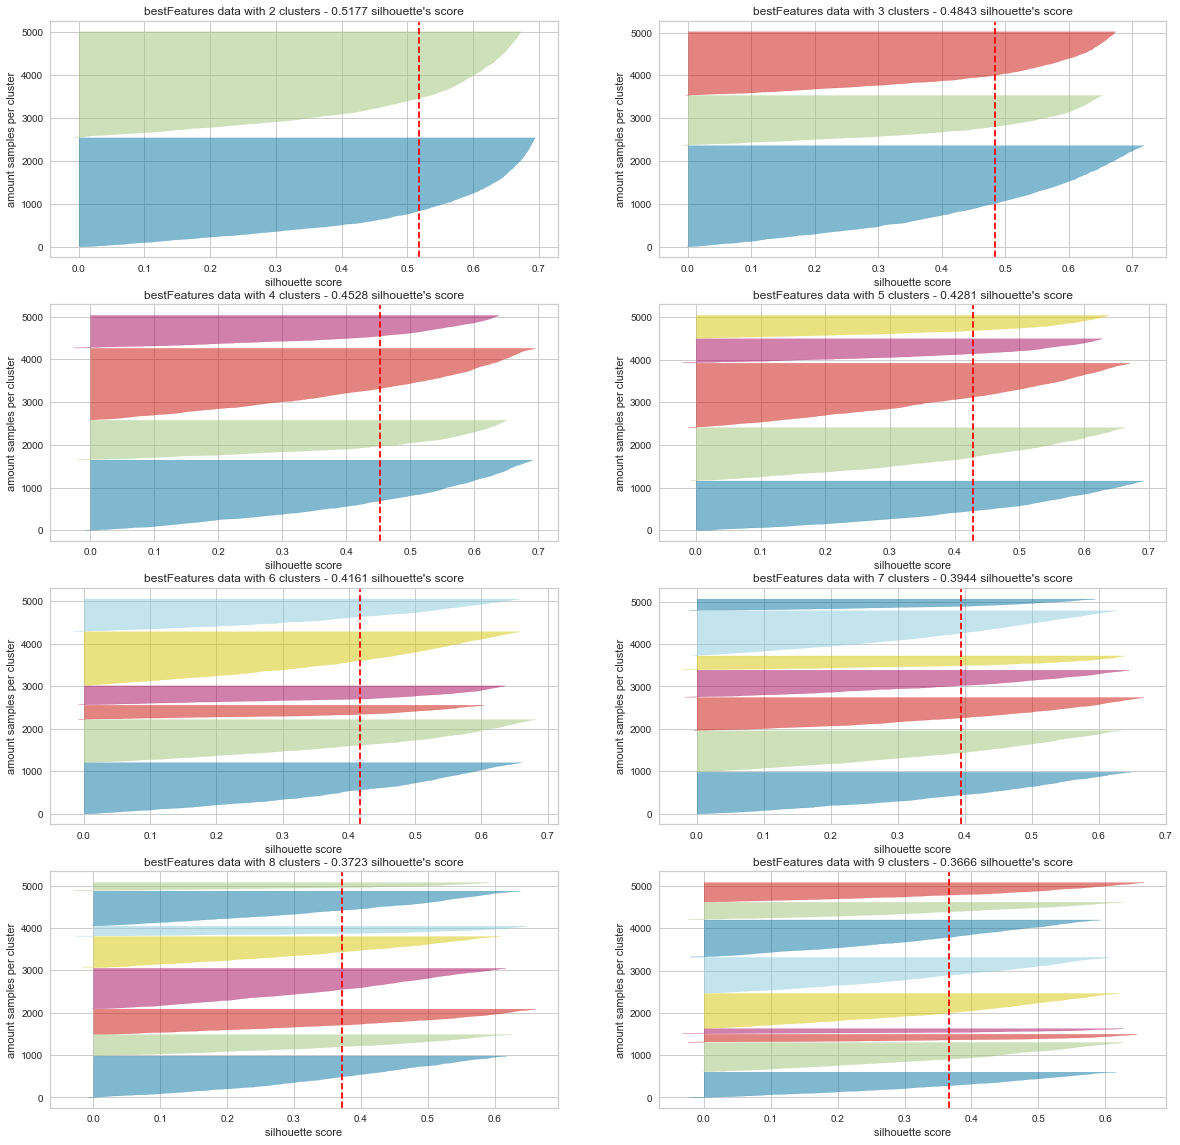

In [58]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
silhouette_scores['bestFeatures'] = plotSilhoetteVisualizer(X = kBestFeatures.iloc[:,:-1],
                                                            Ks = Ks, 
                                                            ax = ax, 
                                                            name = 'bestFeatures data')
plt.show()

c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

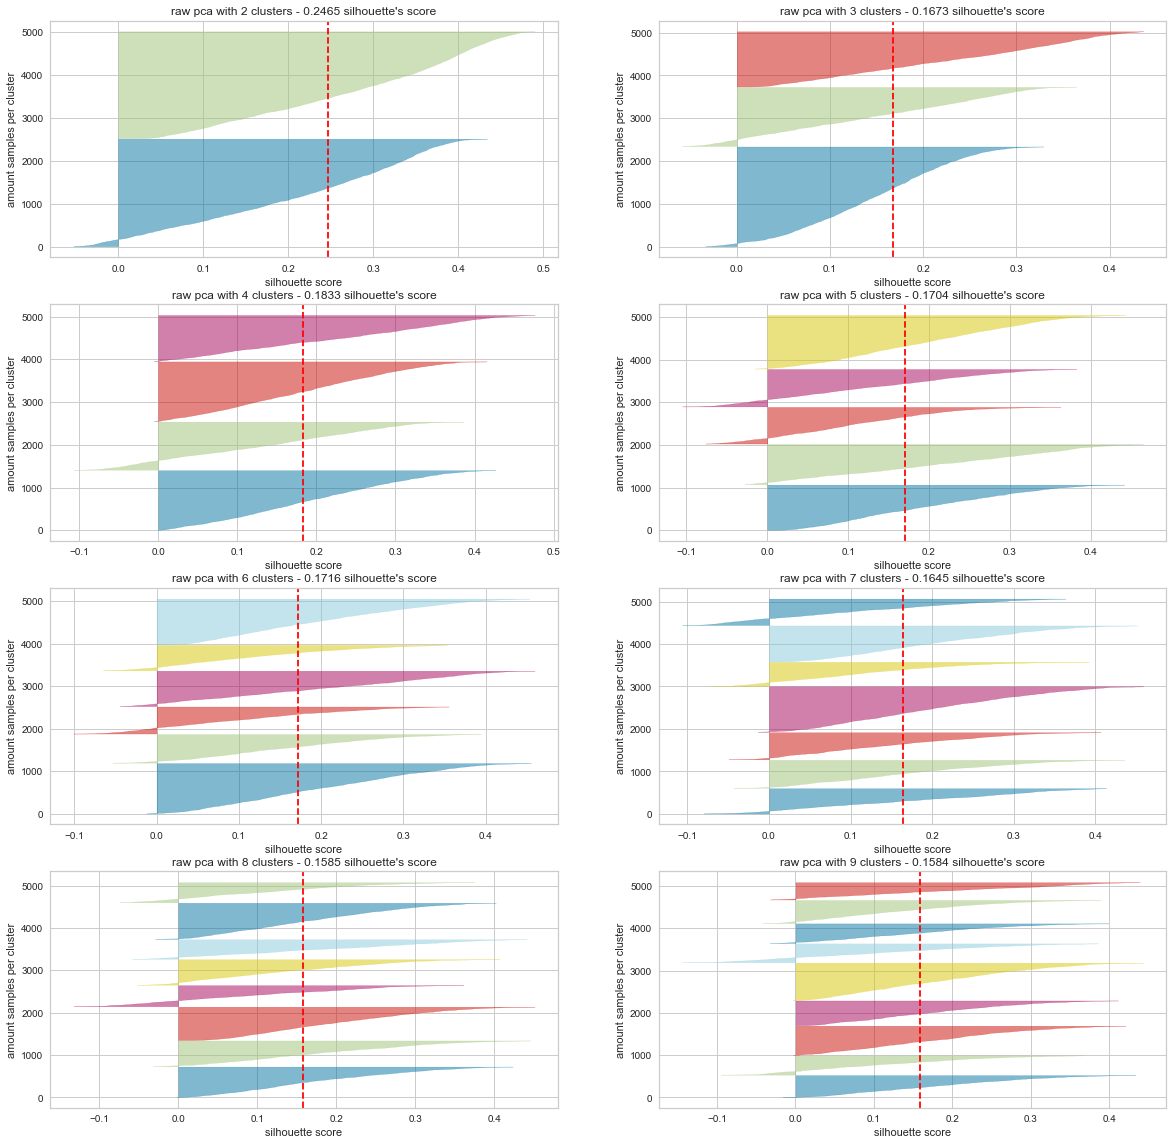

In [59]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
silhouette_scores['rawPCA'] = plotSilhoetteVisualizer(X = PCA_components['raw'].iloc[:,:-1],
                                                      Ks = Ks, 
                                                      ax = ax, 
                                                      name = 'raw pca')

plt.show()

c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

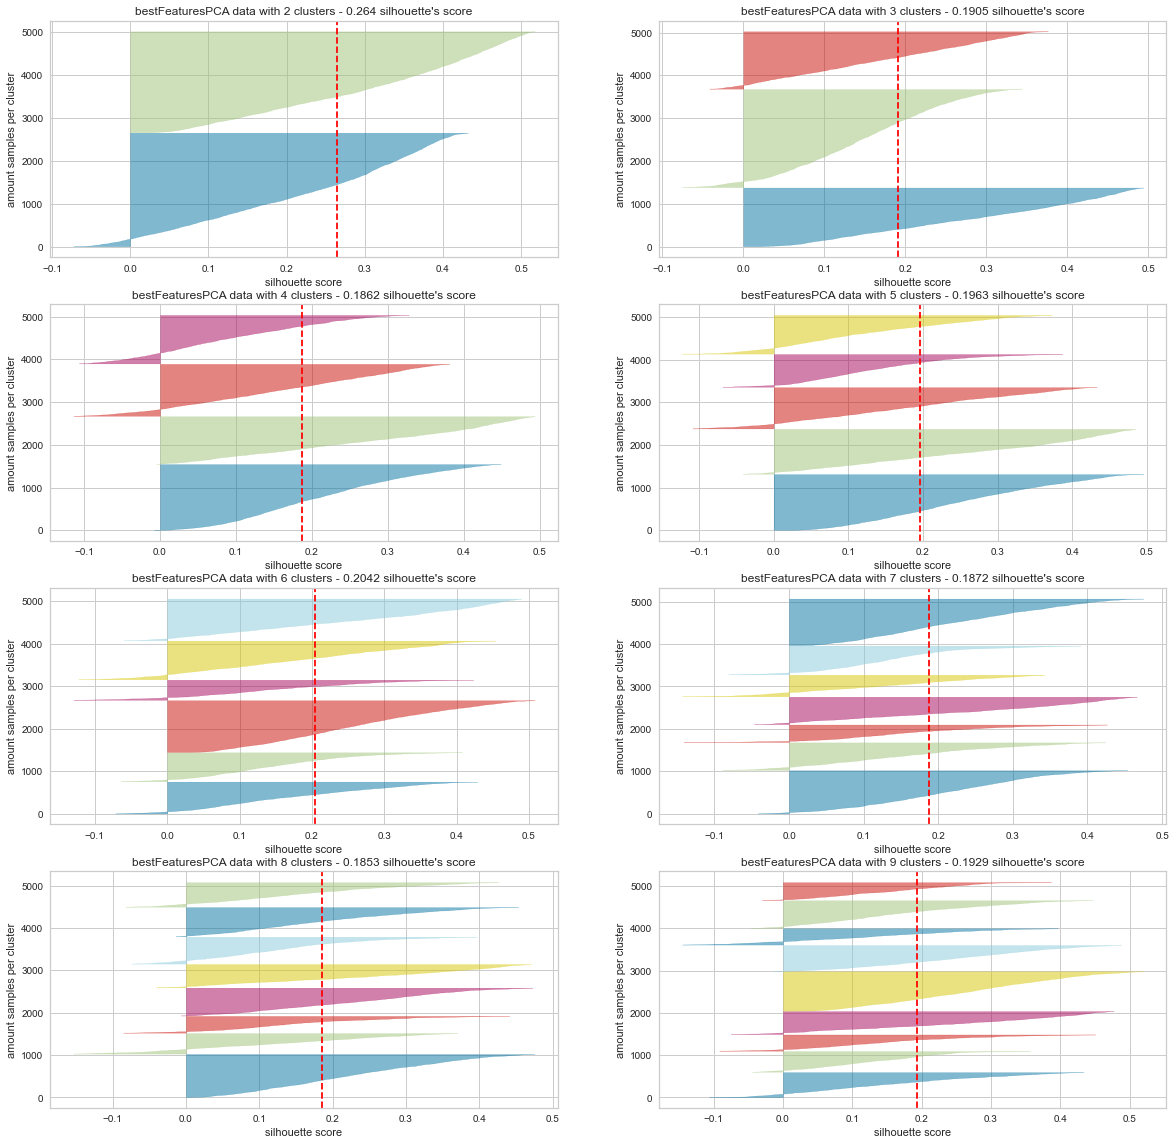

In [60]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
silhouette_scores['bestFeaturesPCA'] = plotSilhoetteVisualizer(X = PCA_components['bestFeatures'].iloc[:,:-1],
                                                               Ks = Ks, 
                                                               ax = ax, 
                                                               name = 'bestFeaturesPCA data')
plt.show()

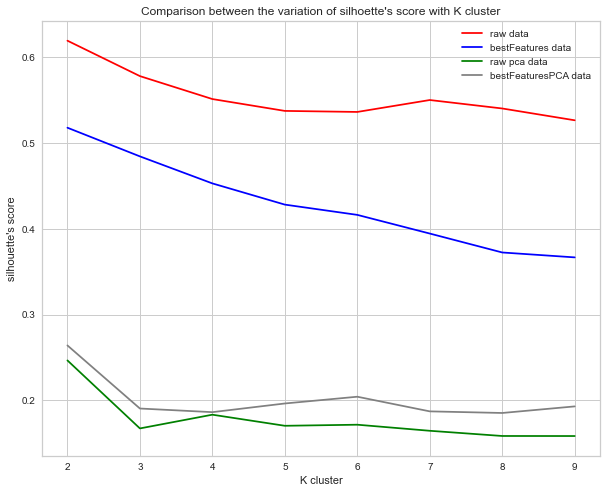

In [61]:
def plot_silhouette_score(silhouette_scores, ax, Ks):
    sns.lineplot(x= Ks, y = silhouette_scores['raw'], color = 'red', ax=ax, label = 'raw data')
    sns.lineplot(x= Ks, y = silhouette_scores['bestFeatures'], color = 'blue', ax=ax, label = 'bestFeatures data')
    sns.lineplot(x= Ks, y = silhouette_scores['rawPCA'], color = 'green', ax=ax, label = 'raw pca data')
    sns.lineplot(x= Ks, y = silhouette_scores['bestFeaturesPCA'], color = 'gray', ax=ax, label = 'bestFeaturesPCA data')

    ax.set(title = "Comparison between the variation of silhoette's score with K cluster",
           xlabel = 'K cluster',
           ylabel = "silhouette's score"
    )

    plt.legend()


fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_silhouette_score(silhouette_scores, ax, Ks)

plt.show()

# Classification

In [114]:
from sklearn.linear_model import LogisticRegression
import time

from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


def mergeDataframes(df1, df2):
    mergedDf = pd.concat([df1, df2], axis = 1)
    return mergedDf

def separateFeatures(X, catVariables):
    numVariables = X.drop(catVariables, axis = 1).columns
    return catVariables, numVariables

def removeUselessColumns(df, columns):
    new_df = df.drop(columns, axis = 1)
    return new_df


def createBaselineModels(preprocessor, red_dim):
    if red_dim != None:
        pipe_rf = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', RandomForestClassifier())
        ])


        pipe_lr = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', LogisticRegression())
        ])

        pipe_knn = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', KNeighborsClassifier())
        ])


        pipe_xgboost = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', XGBClassifier())
        ])

        pipe_svm = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', SVC())
        ])

        pipe_nb = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', GaussianNB())
        ])

        pipe_dt = Pipeline(steps = [
                ('preprocessor', preprocessor),
                #('red_dim', red_dim),
                ('model', DecisionTreeClassifier())
        ])

    else:
        pipe_rf = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', RandomForestClassifier())
        ])

        pipe_lr = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', LogisticRegression())
        ])

        pipe_knn = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', KNeighborsClassifier())
        ])


        pipe_xgboost = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', XGBClassifier())
        ])

        pipe_svm = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', SVC())
        ])

        pipe_nb = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', GaussianNB())
        ])

        pipe_dt = Pipeline(steps = [
                ('preprocessor', preprocessor),
                ('red_dim', red_dim),
                ('model', DecisionTreeClassifier())
        ])

    baseline_models = {
        'Logistic Regression': pipe_lr,
        'Random Forest': pipe_rf,
        'KNN': pipe_knn,
        'XGBoost': pipe_xgboost,
        'Suport Vector Machine': pipe_svm,
        'Naive Bayes': pipe_nb,
        'Decision Tree': pipe_dt
    }

    return baseline_models

def createGridModels(modelsPipeline, red_dim):
    pipe_rf, pipe_lr, pipe_knn, pipe_xgb, pipe_svm, pipe_nb, pipe_dt = modelsPipeline

    if red_dim != None:
        param_grid_rf = {
            'red_dim': [red_dim],
            'model__n_estimators':[100, 300, 500],
            'model__max_depth':[10, 50, 100],
            #'model__max_features': [3, 6, 9]
            #'model__max_features':[6,8,10,12,14,16]
            #'model__min_samples_split':[6],
            #'model__min_samples_leaf':[2, 4]
        }
        param_grid_lr = {
            'red_dim': [red_dim],
            'model__C': np.logspace(-4, 4, 20),
            'model__solver': ['liblinear'],
            'model__penalty': ['l1', 'l2']
        }
        param_grid_knn = {
            'red_dim': [red_dim],
            "model__n_neighbors": [1, 3, 5, 7, 10],
            'model__metric': ['minkowski','euclidean','manhattan'],
            'model__weights': ['uniform','distance'],
            #'model__max_iter': [50, 100, 150]
        }
        param_grid_xgb = {
            'red_dim': [red_dim],
            'model__n_estimators': [100, 500, 100],
            'model__max_depth': [3,4,5],
            'model__learning_rate': [0.01, 0.001]
        }
        param_grid_svm = {
            'red_dim': [red_dim],
            'model__C': [0.1, 1, 10, 100],
            'model__gamma': [1,0.1,0.01,0.001],
            'model__kernel': ['rbf', 'poly', 'sigmoid']
        }
        param_grid_nb = {
            'red_dim': [red_dim],
            'model__var_smoothing': np.logspace(0,-9, num=100)
        }

        param_grid_dt = {
            'red_dim': [red_dim],
            'model__max_depth': [2, 3, 5, 10, 20],
            'model__min_samples_leaf': [5, 10, 20, 50, 100],
            'model__criterion': ["gini", "entropy"]
        }

    else:
        param_grid_rf = {
            #'red_dim': [red_dim],
            'model__n_estimators':[100, 300, 500],
            'model__max_depth':[10, 50, 100],
            #'model__max_features': [3, 6, 9]
            #'model__max_features':[6,8,10,12,14,16]
            #'model__min_samples_split':[6],
            #'model__min_samples_leaf':[2, 4]
        }
        param_grid_lr = {
            #'red_dim': [red_dim],
            'model__C': np.logspace(-4, 4, 20),
            'model__solver': ['liblinear'],
            'model__penalty': ['l1', 'l2']
        }
        param_grid_knn = {
            #'red_dim': [red_dim],
            "model__n_neighbors": [1, 3, 5, 7, 10],
            'model__metric': ['minkowski','euclidean','manhattan'],
            'model__weights': ['uniform','distance'],
            #'model__max_iter': [50, 100, 150]
        }
        param_grid_xgb = {
            #'red_dim': [red_dim],
            'model__n_estimators': [100, 500, 100],
            'model__max_depth': [3,4,5],
            'model__learning_rate': [0.01, 0.001]
        }
        param_grid_svm = {
            #'red_dim': [red_dim],
            'model__C': [0.1, 1, 10, 100],
            'model__gamma': [1,0.1,0.01,0.001],
            'model__kernel': ['rbf', 'poly', 'sigmoid']
        }
        param_grid_nb = {
            #'red_dim': [red_dim],
            'model__var_smoothing': np.logspace(0,-9, num=100)
        }

        param_grid_dt = {
            #'red_dim': [red_dim],
            'model__max_depth': [2, 3, 5, 10, 20],
            'model__min_samples_leaf': [5, 10, 20, 50, 100],
            'model__criterion': ["gini", "entropy"]
        }


    rf = GridSearchCV(pipe_rf, param_grid_rf, n_jobs = -1)
    lr = GridSearchCV(pipe_lr, param_grid_lr, n_jobs = -1)
    knn = GridSearchCV(pipe_knn, param_grid_knn, n_jobs = -1)
    xgb = GridSearchCV(pipe_xgb, param_grid_xgb, n_jobs = -1)
    svm = GridSearchCV(pipe_svm, param_grid_svm, n_jobs = -1)
    nb = GridSearchCV(pipe_nb, param_grid_nb, n_jobs = -1)
    dt = GridSearchCV(pipe_dt, param_grid_dt, n_jobs = -1)

    grid_models = {
        'Logistic Regression': lr,
        'Random Forest': rf,
        'KNN': knn,
        'XGBoost': xgb,
        'Support Vector Machine': svm,
        'Gausian Naive Bayes': nb,
        'Decision Tree': dt
    }
    return grid_models



def createModels(preprocessor, withGrid, red_dim = None):
    np.random.seed(42)

    modelsPipeline = createBaselineModels(preprocessor, red_dim)

    if withGrid:
        modelsGrid = createGridModels(modelsPipeline, red_dim)
        return modelsGrid

    return modelsPipeline

        


def preprocessingData(cat_features, num_features, scaler, encoder):
    ## Tratamento para variáveis categóricas
    cat_transformer = Pipeline(steps = [
        ('encoder', encoder)
    ])

    ## Tratamento para variáveis numéricas
    num_transformer = Pipeline(steps = [
        ('scaler', scaler)
    ])

    ## Transformando os dados
    preprocessor = ColumnTransformer(transformers = [
        ('numbers', num_transformer, num_features),
        ('categories', cat_transformer, cat_features)
    ])

    ## Retornando o processador de dados
    return preprocessor

def format_metrics(scores):
    avg = round(np.mean(scores), 2)
    std = round(np.std(scores), 2)
    return f'{str(avg)} ({str(std)})'

def trainModels(X, y, models, skf):
    scoring = ('accuracy', 'precision', 'recall', 'f1')
    models_scores = {}

    for modelName, model in models.items():
        startTime = time.time()
        scores = cross_validate(model, X, y, cv=skf, scoring=scoring)

        cross_metrics = {
            'accuracy': format_metrics(scores['test_accuracy']),
            'precision': format_metrics(scores['test_precision']),
            'recall': format_metrics(scores['test_recall']),
            'f1': format_metrics(scores['test_f1'])
        }

        models_scores[modelName] = cross_metrics

        endTime = time.time()
        print(f'{modelName}: {round(endTime - startTime, 2)} seconds')

    return models_scores


def runModels(X, y, catFeatures, numFeatures, scaler, encoder, withGrid=False, redDim=None):
    preprocessor = preprocessingData(cat_features=catFeatures, num_features=numFeatures, scaler=scaler, encoder=encoder)
    models = createModels(preprocessor, withGrid, redDim)
    skf = StratifiedKFold(n_splits=10)
    models_scores = trainModels(X, y, models, skf)
    models_scores = pd.DataFrame(models_scores)
    models_acc = models_scores.loc['accuracy'].values
    models_names = models.keys()
    return models_acc, models_scores, models_names


def dataPipeline(data_dict):
    models_acc = {}
    models_metrics = {}

    for dataName, data in data_dict.items():
        print(f'---{dataName} started---', end='\n\n')
        startTime = time.time()

        X, y = splitData(data, ['flWinner'], 'flWinner')
        catFeatures, numFeatures = separateFeatures(X, [])
        models_acc[dataName], models_metrics[dataName], models_names = runModels(
            X, y, catFeatures, numFeatures, StandardScaler(), OneHotEncoder(handle_unknown='ignore')
        )

        endTime = time.time()
        print(f'\n---{dataName}: completed in {round(endTime - startTime, 2)} seconds---', end='\n\n')

    models_acc = pd.DataFrame(models_acc, index=models_names)
    return models_acc, models_metrics
            


In [63]:
print(f"1. sample data columns: {sampleData.columns}", end = '\n\n')
print(f"2. best features data columns: {kBestFeatures.columns}", end = '\n\n')
print(f"3. pca from raw data columns: {PCA_components['raw'].columns}", end = '\n\n')
print(f"4. pca from best features data columns: {PCA_components['bestFeatures'].columns}", end = '\n\n')

1. sample data columns: Index(['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtFirstKill',
       'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive', 'qtClutchWon',
       'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived', 'qtTrade',
       'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach',
       'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg', 'qtHitRightLeg',
       'flWinner', 'dtCreatedAt'],
      dtype='object')

2. best features data columns: Index(['qtSurvived', 'qtDeath', 'qtKill', 'vlDamage', 'qt2Kill', 'qtHits',
       'qtFlashAssist', 'qtShots', 'qtBombeDefuse', 'qt1Kill', 'flWinner'],
      dtype='object')

3. pca from raw data columns: Index(['0', '1', '2', '3', '4', 'flWinner'], dtype='object')

4. pca from best features data columns: Index(['0', '1', '2', '3', '4', 'flWinner'], dtype='object')



In [64]:
sampleData = removeUselessColumns(sampleData, ['idLobbyGame', 'idPlayer', 'idRoom', 'dtCreatedAt'])
dataCleaned = removeUselessColumns(dataCleaned, ['idLobbyGame', 'idPlayer', 'idRoom', 'dtCreatedAt'])

In [115]:
sampleResults = pd.DataFrame()
samples = {
    'raw data sample': sampleData,
    'best features data sample': kBestFeatures,
    'pca from raw data sample': PCA_components['raw'],
    'pca from best features data sample': PCA_components['bestFeatures']
}

sampleAcc, sampleMetrics = dataPipeline(samples)
sampleAcc

---raw data sample started---

Logistic Regression: 0.81 seconds
Random Forest: 12.94 seconds
KNN: 0.54 seconds
XGBoost: 4.82 seconds
Suport Vector Machine: 10.85 seconds
Naive Bayes: 0.27 seconds
Decision Tree: 0.87 seconds

---raw data sample: completed in 31.11 seconds---

---best features data sample started---

Logistic Regression: 0.34 seconds
Random Forest: 11.16 seconds
KNN: 0.79 seconds
XGBoost: 2.67 seconds
Suport Vector Machine: 8.14 seconds
Naive Bayes: 0.18 seconds
Decision Tree: 0.45 seconds

---best features data sample: completed in 23.73 seconds---

---pca from raw data sample started---

Logistic Regression: 0.22 seconds
Random Forest: 19.22 seconds
KNN: 0.47 seconds
XGBoost: 4.61 seconds
Suport Vector Machine: 10.1 seconds
Naive Bayes: 0.19 seconds
Decision Tree: 0.51 seconds

---pca from raw data sample: completed in 35.32 seconds---

---pca from best features data sample started---

Logistic Regression: 0.23 seconds
Random Forest: 17.23 seconds
KNN: 0.47 seconds
XG

raw data sample best features data sample  \
Logistic Regression        0.8 (0.01)               0.78 (0.02)   
Random Forest             0.79 (0.02)               0.77 (0.02)   
KNN                       0.72 (0.01)               0.73 (0.02)   
XGBoost                   0.79 (0.02)               0.76 (0.01)   
Suport Vector Machine      0.8 (0.02)               0.77 (0.02)   
Naive Bayes               0.71 (0.03)               0.74 (0.02)   
Decision Tree             0.73 (0.02)               0.71 (0.01)   

                      pca from raw data sample  \
Logistic Regression                0.66 (0.02)   
Random Forest                      0.64 (0.02)   
KNN                                0.61 (0.03)   
XGBoost                            0.63 (0.02)   
Suport Vector Machine              0.66 (0.02)   
Naive Bayes                        0.65 (0.02)   
Decision Tree                      0.58 (0.01)   

                      pca from best features data sample  
Logistic Regression                          0.77 (0.02)  
Random Forest                                0.76 (0.02)  
KNN                                          0.75 (0.02)  
XGBoost                                      0.76 (0.02)  
Suport Vector Machine                        0.78 (0.02)  
Naive Bayes                                  0.76 (0.02)  
Decision Tree                                 0.7 (0.03)

In [117]:
def extract_metrics(dictionary):
    data = {}
    
    for sample_name, sample_data in dictionary.items():
        data[sample_name] = {}
        
        sample_data = sample_data.rename(columns=lambda x: x.strip())  # Remove leading/trailing whitespace from column names
        
        for model_name, metrics in sample_data.items():
            data[sample_name][model_name] = {}
            
            for metric_name, metric_value in metrics.iteritems():
                metric = metric_name.strip()  # Remove leading/trailing whitespace from metric name
                data[sample_name][model_name][metric] = metric_value
    
    # Creating the DataFrame
    df = pd.DataFrame()
    
    for sample_name, models in data.items():
        sample_df = pd.DataFrame.from_dict(models, orient='index')
        sample_df.insert(0, 'Data', sample_name)
        df = pd.concat([df, sample_df], axis=0)
    
    df = df.reset_index().rename(columns={'index': 'Model'})
    df = df.set_index(['Data', 'Model'])
    
    return df


metrics_df = extract_metrics(sampleMetrics)
metrics_df

accuracy  \
Data                               Model                                
raw data sample                    Logistic Regression     0.8 (0.01)   
                                   Random Forest          0.79 (0.02)   
                                   KNN                    0.72 (0.01)   
                                   XGBoost                0.79 (0.02)   
                                   Suport Vector Machine   0.8 (0.02)   
                                   Naive Bayes            0.71 (0.03)   
                                   Decision Tree          0.73 (0.02)   
best features data sample          Logistic Regression    0.78 (0.02)   
                                   Random Forest          0.77 (0.02)   
                                   KNN                    0.73 (0.02)   
                                   XGBoost                0.76 (0.01)   
                                   Suport Vector Machine  0.77 (0.02)   
                                   Naive Bayes            0.74 (0.02)   
                                   Decision Tree          0.71 (0.01)   
pca from raw data sample           Logistic Regression    0.66 (0.02)   
                                   Random Forest          0.64 (0.02)   
                                   KNN                    0.61 (0.03)   
                                   XGBoost                0.63 (0.02)   
                                   Suport Vector Machine  0.66 (0.02)   
                                   Naive Bayes            0.65 (0.02)   
                                   Decision Tree          0.58 (0.01)   
pca from best features data sample Logistic Regression    0.77 (0.02)   
                                   Random Forest          0.76 (0.02)   
                                   KNN                    0.75 (0.02)   
                                   XGBoost                0.76 (0.02)   
                                   Suport Vector Machine  0.78 (0.02)   
                                   Naive Bayes            0.76 (0.02)   
                                   Decision Tree           0.7 (0.03)   

                                                            precision  \
Data                               Model                                
raw data sample                    Logistic Regression    0.79 (0.02)   
                                   Random Forest           0.8 (0.03)   
                                   KNN                    0.72 (0.02)   
                                   XGBoost                0.78 (0.02)   
                                   Suport Vector Machine   0.8 (0.02)   
                                   Naive Bayes            0.68 (0.03)   
                                   Decision Tree          0.71 (0.02)   
best features data sample          Logistic Regression    0.77 (0.02)   
                                   Random Forest          0.77 (0.03)   
                                   KNN                    0.73 (0.02)   
                                   XGBoost                0.76 (0.02)   
                                   Suport Vector Machine  0.78 (0.02)   
                                   Naive Bayes             0.7 (0.02)   
                                   Decision Tree          0.69 (0.02)   
pca from raw data sample           Logistic Regression    0.66 (0.03)   
                                   Random Forest          0.62 (0.02)   
                                   KNN                    0.59 (0.03)   
                                   XGBoost                0.61 (0.02)   
                                   Suport Vector Machine  0.65 (0.02)   
                                   Naive Bayes            0.65 (0.03)   
                                   Decision Tree          0.55 (0.01)   
pca from best features data sample Logistic Regression    0.77 (0.02)   
                                   Random Forest          0.76 (0.03)   
                                   KNN       

In [105]:
sampleMetrics

{'raw data sample':           Logistic Regression Random Forest          KNN      XGBoost  \
 accuracy           0.8 (0.01)   0.79 (0.02)  0.72 (0.01)  0.79 (0.02)   
 precision         0.79 (0.02)    0.8 (0.03)  0.72 (0.02)  0.78 (0.02)   
 recall            0.79 (0.03)   0.75 (0.03)  0.66 (0.02)  0.77 (0.03)   
 f1                0.79 (0.02)   0.77 (0.02)  0.69 (0.01)  0.77 (0.02)   
 
           Suport Vector Machine  Naive Bayes Decision Tree  
 accuracy             0.8 (0.02)  0.71 (0.03)   0.73 (0.02)  
 precision            0.8 (0.02)  0.68 (0.03)   0.71 (0.02)  
 recall              0.78 (0.03)  0.74 (0.03)   0.71 (0.02)  
 f1                  0.79 (0.02)  0.71 (0.03)   0.71 (0.02)  ,
 'best features data sample':           Logistic Regression Random Forest          KNN      XGBoost  \
 accuracy          0.78 (0.02)   0.77 (0.02)  0.73 (0.02)  0.76 (0.01)   
 precision         0.77 (0.02)   0.77 (0.03)  0.73 (0.02)  0.76 (0.02)   
 recall            0.75 (0.03)   0.72 (0.03)   

In [92]:
metrics_dict

{'raw data sample': {'raw data sample':           Logistic Regression Random Forest          KNN      XGBoost  \
  accuracy           0.8 (0.01)   0.79 (0.02)  0.72 (0.01)  0.79 (0.02)   
  precision         0.79 (0.02)    0.8 (0.03)  0.72 (0.02)  0.78 (0.02)   
  recall            0.79 (0.03)   0.75 (0.03)  0.66 (0.02)  0.77 (0.03)   
  f1                0.79 (0.02)   0.77 (0.02)  0.69 (0.01)  0.77 (0.02)   
  
            Suport Vector Machine  Naive Bayes Decision Tree  
  accuracy             0.8 (0.02)  0.71 (0.03)   0.73 (0.02)  
  precision            0.8 (0.02)  0.68 (0.03)   0.71 (0.02)  
  recall              0.78 (0.03)  0.74 (0.03)   0.71 (0.02)  
  f1                  0.79 (0.02)  0.71 (0.03)   0.71 (0.02)  ,
  'best features data sample':           Logistic Regression Random Forest          KNN      XGBoost  \
  accuracy          0.78 (0.02)   0.77 (0.02)  0.73 (0.02)  0.76 (0.01)   
  precision         0.77 (0.02)   0.77 (0.03)  0.73 (0.02)  0.76 (0.02)   
  recall      

In [ ]:
sampleMetrics['raw data sample']

Logistic Regression Random Forest          KNN      XGBoost  \
accuracy           0.8 (0.01)   0.79 (0.02)  0.72 (0.01)  0.79 (0.02)   
precision         0.79 (0.02)    0.8 (0.03)  0.72 (0.02)  0.78 (0.02)   
recall            0.79 (0.03)   0.75 (0.03)  0.66 (0.02)  0.77 (0.03)   
f1                0.79 (0.02)   0.77 (0.02)  0.69 (0.01)  0.77 (0.02)   

          Suport Vector Machine  Naive Bayes Decision Tree  
accuracy             0.8 (0.02)  0.71 (0.03)   0.73 (0.02)  
precision            0.8 (0.02)  0.68 (0.03)   0.71 (0.02)  
recall              0.78 (0.03)  0.74 (0.03)   0.71 (0.02)  
f1                  0.79 (0.02)  0.71 (0.03)   0.71 (0.02)

In [ ]:
'''
fullDataResults = pd.DataFrame()

X, y = splitData(dataCleaned, ['flWinner'], 'flWinner')
catFeatures = ['descMapName']
numFeatures = X.drop(catFeatures, axis = 1).columns

rawClassif = runModels(X, y, 'raw', catFeatures, numFeatures, MinMaxScaler(), OneHotEncoder(handle_unknown='ignore'))
fullDataResults = mergeDataframes(fullDataResults, rawClassif)
fullDataResults
'''

"\nfullDataResults = pd.DataFrame()\n\nX, y = splitData(dataCleaned, ['flWinner'], 'flWinner')\ncatFeatures = ['descMapName']\nnumFeatures = X.drop(catFeatures, axis = 1).columns\n\nrawClassif = runModels(X, y, 'raw', catFeatures, numFeatures, MinMaxScaler(), OneHotEncoder(handle_unknown='ignore'))\nfullDataResults = mergeDataframes(fullDataResults, rawClassif)\nfullDataResults\n"

# Test

0         1         2         3         4  flWinner
0    -2.320876 -1.377477 -2.461628  0.087863 -1.602845         1
1    -4.506702  2.643190  1.846102 -0.141060 -2.868977         1
2    -2.861705  0.552804  2.483435 -2.451352  0.700114         1
3     0.856039  1.895379  0.997868  0.552490  0.313192         0
4     1.027886  1.567429 -0.818470  0.844311 -2.355331         0
...        ...       ...       ...       ...       ...       ...
4995  1.772427  0.127169  0.862688 -0.226637 -1.316121         1
4996  1.457024 -2.079514 -1.246304  2.656823 -0.656016         1
4997 -0.787940  1.668498  0.406848  0.193246  0.277219         0
4998  2.080724 -0.929908  0.380981 -2.101904  0.455512         0
4999 -1.867774 -2.909952  3.601167  0.924201  0.126110         0

[5000 rows x 6 columns]

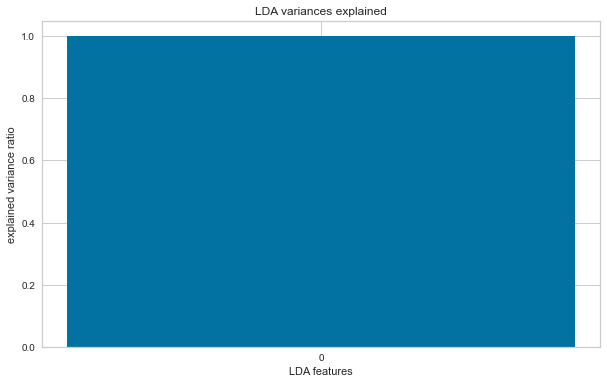

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def calculatingLDA(X, y, title, n_components):
    fig, ax = plt.subplots(figsize=(10, 6))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lda = LDA(n_components=n_components)
    X_lda = lda.fit_transform(X_scaled, y)

    new_df = pd.DataFrame(X_lda)
    new_df['target'] = y.values

    features = np.arange(n_components)
    ax.bar(features, lda.explained_variance_ratio_)
    ax.set(xlabel='LDA features', ylabel='explained variance ratio', xticks=features, title=title)

    return new_df

X, y = splitData(sampleData, ['flWinner'], 'flWinner')
LDA_components = {}
LDA_components['raw'] = calculatingLDA(X, y, 'LDA variances explained', 1)
LDA_components['raw'] = converColumnsToString(PCA_components['raw'])
LDA_components['raw']

In [ ]:
PCA_components['raw']

0         1         2         3         4  flWinner
0    -2.320876 -1.377477 -2.461628  0.087863 -1.602845         1
1    -4.506702  2.643190  1.846102 -0.141060 -2.868977         1
2    -2.861705  0.552804  2.483435 -2.451352  0.700114         1
3     0.856039  1.895379  0.997868  0.552490  0.313192         0
4     1.027886  1.567429 -0.818470  0.844311 -2.355331         0
...        ...       ...       ...       ...       ...       ...
4995  1.772427  0.127169  0.862688 -0.226637 -1.316121         1
4996  1.457024 -2.079514 -1.246304  2.656823 -0.656016         1
4997 -0.787940  1.668498  0.406848  0.193246  0.277219         0
4998  2.080724 -0.929908  0.380981 -2.101904  0.455512         0
4999 -1.867774 -2.909952  3.601167  0.924201  0.126110         0

[5000 rows x 6 columns]

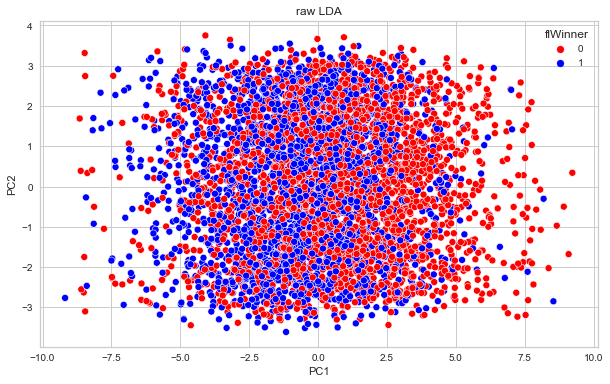

---fvck started---

Logistic Regression: 0.14 seconds
Random Forest: 28.61 seconds
KNN: 0.37 seconds
XGBoost: 3.54 seconds
Suport Vector Machine: 10.34 seconds
Naive Bayes: 0.15 seconds
Decision Tree: 0.76 seconds

---fvck: completed in 43.91 seconds---



fvck
Logistic Regression    0.66 (0.02)
Random Forest          0.64 (0.02)
KNN                    0.61 (0.03)
XGBoost                0.63 (0.02)
Suport Vector Machine  0.66 (0.02)
Naive Bayes            0.65 (0.02)
Decision Tree          0.58 (0.01)

In [ ]:
plotPCA(df = LDA_components['raw'], title = 'raw LDA')
teste = {
    'fvck': LDA_components['raw']
}

teste_df = dataPipeline(teste)
teste_df